In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft
import numpy as np
from wordcloud import WordCloud, STOPWORDS

# Data cleaning, dealing with duplicated rows and keeping the VAERS ID first row.

In [2]:
v_data_2020 =  pd.read_csv('../data/2020VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\2532601228.py:1: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2020 =  pd.read_csv('../data/2020VAERSData.csv')


In [3]:
v_vax_2020 = pd.read_csv('../data/2020VAERSVAX.csv')

In [4]:
v_symptoms_2020 = pd.read_csv('../data/2020VAERSSYMPTOMS.csv')

In [5]:
dfs = [v_data_2020, v_vax_2020,v_symptoms_2020]
vaccination_2020 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [6]:
vaccination_2020.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,855017,1/1/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,Arthralgia,22.1,Chills,22.1,Injection site pain,22.1,Pyrexia,22.1,NaN,NaN
1,855018,1/1/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,Chills,22.1,Fatigue,22.1,Hypertension,22.1,Hypoaesthesia,22.1,Injected limb mobility decreased,22.1
2,855018,1/1/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,Muscular weakness,22.1,Pain in extremity,22.1,Pyrexia,22.1,Tremor,22.1,Vertigo,22.1
3,855019,1/1/2020,NaN,50.0,50.0,NaN,F,NaN,SORENESS IN THE AREA. ITCHING AND RASH,NaN,...,Pain,22.1,Pruritus,22.1,Rash,22.1,NaN,NaN,NaN,NaN
4,855020,1/1/2020,TX,67.0,67.0,NaN,F,NaN,"sore arm, fever 101 , chills, and aching musc...",NaN,...,Chills,22.1,Influenza like illness,22.1,Myalgia,22.1,Pain in extremity,22.1,Pyrexia,22.1


In [7]:
vaccination_2020.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [8]:
vaccination_2020 = vaccination_2020.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [9]:
vaccination_2020 = vaccination_2020.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

# Need to remove unwanted columns

In [10]:
v_data_2021 = pd.read_csv('../data/2021VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\344949492.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2021 = pd.read_csv('../data/2021VAERSData.csv')


In [11]:
v_vax_2021 = pd.read_csv('../data/2021VAERSVAX.csv')

In [12]:
v_symptoms_2021 = pd.read_csv('../data/2021VAERSSYMPTOMS.csv')

In [13]:
dfs = [v_data_2021, v_vax_2021,v_symptoms_2021]
vaccination_2021 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [14]:
vaccination_2021.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,1/1/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,1/1/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,1/1/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,1/1/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,1/1/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [15]:
vaccination_2021.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [16]:
vaccination_2021

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,1/1/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,1/1/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,1/1/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,1/1/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,1/1/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049875,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Dyspnoea,24.1,Echocardiogram normal,24.1,Ejection fraction normal,24.1,Facial paralysis,24.1,Feeling abnormal,24.1
1049876,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Gastrointestinal haemorrhage,24.1,Gastrostomy,24.1,Hyperlipidaemia,24.1,Hypertension,24.1,Laboratory test,24.1
1049877,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Magnetic resonance imaging head abnormal,24.1,Oesophagogastroduodenoscopy,24.1,Peripheral swelling,24.1,Type 2 diabetes mellitus,24.1,Ultrasound Doppler normal,24.1
1049878,1998663,12/31/2021,TN,83.0,83.0,NaN,F,NaN,"She had a stroke on April 1st, 2021 while at t...",Y,...,Urinary tract infection,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
vaccination_2021 = vaccination_2021.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [18]:
vaccination_2021 = vaccination_2021.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [19]:
v_data_2022 = pd.read_csv('../data/2022VAERSData.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\2420831445.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  v_data_2022 = pd.read_csv('../data/2022VAERSData.csv')


In [20]:
v_vax_2022 = pd.read_csv('../data/2022VAERSVAX.csv')

In [21]:
v_symptoms_2022 = pd.read_csv('../data/2022VAERSSYMPTOMS.csv')

In [22]:
dfs = [v_data_2022, v_vax_2022,v_symptoms_2022]
vaccination_2022 = ft.reduce(lambda left, right: pd.merge(left, right, on='VAERS_ID'), dfs)

In [23]:
vaccination_2022

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,1996873,1/1/2022,CA,NaN,NaN,NaN,U,NaN,This spontaneous report was received from a ph...,NaN,...,Expired product administered,24.1,No adverse event,24.1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996874,1/1/2022,NaN,NaN,NaN,NaN,U,NaN,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,NaN,...,Suspected COVID-19,24.1,Vaccination failure,24.1,NaN,NaN,NaN,NaN,NaN,NaN
2,1996875,1/1/2022,OH,NaN,NaN,NaN,M,NaN,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,NaN,...,SARS-CoV-2 test,24.1,Suspected COVID-19,24.1,Vaccination failure,24.1,NaN,NaN,NaN,NaN
3,1996876,1/1/2022,MS,34.0,NaN,NaN,F,NaN,Irregular menstrual cycle.; period extremely h...,NaN,...,Dysmenorrhoea,24.1,Heavy menstrual bleeding,24.1,Menstruation irregular,24.1,NaN,NaN,NaN,NaN
4,1996877,1/1/2022,CT,NaN,NaN,NaN,F,NaN,Breakthrough and heavy periods; longer period ...,NaN,...,Heavy menstrual bleeding,24.1,Oligomenorrhoea,24.1,SARS-CoV-2 test negative,24.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355255,2516519,11/25/2022,CA,68.0,68.0,NaN,F,NaN,Soreness in the site of injection; This sponta...,NaN,...,Vaccination site pain,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355256,2516520,11/25/2022,NaN,NaN,NaN,NaN,U,NaN,Felt far worse the next day; Arm had a big rai...,NaN,...,Feeling abnormal,25.1,Vaccination site erythema,25.1,Vaccination site mass,25.1,NaN,NaN,NaN,NaN
355257,2516521,11/25/2022,MA,74.0,74.0,NaN,F,NaN,I have tight muscles up the front of my legs; ...,NaN,...,Arthralgia,25.1,COVID-19 immunisation,25.1,Disability,25.1,Interchange of vaccine products,25.1,Muscle spasms,25.1
355258,2516521,11/25/2022,MA,74.0,74.0,NaN,F,NaN,I have tight muscles up the front of my legs; ...,NaN,...,Muscle tightness,25.1,Pain in extremity,25.1,Ultrasound scan,25.1,NaN,NaN,NaN,NaN


In [24]:
vaccination_2022.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [25]:
vaccination_2022 = vaccination_2022.drop_duplicates(subset = 'VAERS_ID', keep = 'first')

In [26]:
vaccination_2022 = vaccination_2022.loc[:, ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT','HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE','ONSET_DATE', 'NUMDAYS', 'LAB_DATA','OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT','ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1','SYMPTOM2', 'SYMPTOM3','SYMPTOM4', 'SYMPTOM5']]

In [27]:
vaccination_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,1996873,CA,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,R017624,UNK,NaN,NaN,HPV (GARDASIL 9),Expired product administered,No adverse event,NaN,NaN,NaN
1,1996874,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,OT,NaN,COVID19 (COVID19 (JANSSEN)),Suspected COVID-19,Vaccination failure,NaN,NaN,NaN
2,1996875,OH,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,204A21A,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN
3,1996876,MS,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,Fd8448,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN
4,1996877,CT,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,EP6955,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355254,2516518,NaN,NaN,F,Y,5/17/2021,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,NaN,NaN,NaN,NaN
355255,2516519,CA,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,011M20A,4,OT,NaN,COVID19 (COVID19 (MODERNA)),Vaccination site pain,NaN,NaN,NaN,NaN
355256,2516520,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Feeling abnormal,Vaccination site erythema,Vaccination site mass,NaN,NaN
355257,2516521,MA,74.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,017H22A,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,COVID-19 immunisation,Disability,Interchange of vaccine products,Muscle spasms


vaccination_2022_covid = vaccination_2022.loc[vaccination_2022['VAX_TYPE']=='COVID19']

vaccination_2022_covid

vaccination_2022_covid.loc[vaccination_2022_covid['DIED']== 'Y']

pd.set_option('display.max_rows', None)

#  Use VAX_Name instead of type. Need to use regex to strip the name and remove(). 

In [28]:
vaccination_2022.VAX_NAME

0                            HPV (GARDASIL 9)
1                 COVID19 (COVID19 (JANSSEN))
2                 COVID19 (COVID19 (JANSSEN))
3         COVID19 (COVID19 (PFIZER-BIONTECH))
4         COVID19 (COVID19 (PFIZER-BIONTECH))
                         ...                 
355254            COVID19 (COVID19 (JANSSEN))
355255            COVID19 (COVID19 (MODERNA))
355256            COVID19 (COVID19 (MODERNA))
355257            COVID19 (COVID19 (MODERNA))
355259            COVID19 (COVID19 (MODERNA))
Name: VAX_NAME, Length: 228433, dtype: object

In [29]:
 v_name = vaccination_2022.VAX_NAME.str.split(' \(', expand = True)

In [30]:
v_name

,0,1,2,3,4
0,HPV,GARDASIL 9),None,None,None
1,COVID19,COVID19,JANSSEN)),None,None
2,COVID19,COVID19,JANSSEN)),None,None
3,COVID19,COVID19,PFIZER-BIONTECH)),None,None
4,COVID19,COVID19,PFIZER-BIONTECH)),None,None
...,...,...,...,...,...
355254,COVID19,COVID19,JANSSEN)),None,None
355255,COVID19,COVID19,MODERNA)),None,None
355256,COVID19,COVID19,MODERNA)),None,None
355257,COVID19,COVID19,MODERNA)),None,None


In [31]:
v_name = v_name[0]

In [32]:
vaccination_2022['V_NAME']= v_name

In [33]:
vaccination_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,1996873,CA,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,HPV (GARDASIL 9),Expired product administered,No adverse event,NaN,NaN,NaN,HPV
1,1996874,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,1,OT,NaN,COVID19 (COVID19 (JANSSEN)),Suspected COVID-19,Vaccination failure,NaN,NaN,NaN,COVID19
2,1996875,OH,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN,COVID19
3,1996876,MS,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN,COVID19
4,1996877,CT,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355254,2516518,NaN,NaN,F,Y,5/17/2021,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,NaN,NaN,NaN,NaN,COVID19
355255,2516519,CA,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,4,OT,NaN,COVID19 (COVID19 (MODERNA)),Vaccination site pain,NaN,NaN,NaN,NaN,COVID19
355256,2516520,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Feeling abnormal,Vaccination site erythema,Vaccination site mass,NaN,NaN,COVID19
355257,2516521,MA,74.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,COVID-19 immunisation,Disability,Interchange of vaccine products,Muscle spasms,COVID19


In [34]:
 v_name2 = vaccination_2021.VAX_NAME.str.split(' \(', expand = True)

In [35]:
v_name2 = v_name2[0]

In [36]:
v_name2

0                        COVID19
1                        COVID19
2                        COVID19
3                        COVID19
4                        COVID19
                   ...          
1049869                  COVID19
1049871                  COVID19
1049872                  COVID19
1049873                  COVID19
1049879    VACCINE NOT SPECIFIED
Name: 0, Length: 738352, dtype: object

In [37]:
vaccination_2021['V_NAME']= v_name2

In [38]:
vaccination_2021

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19
3,916603,WA,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,COVID19
4,916604,TX,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049869,1997120,ID,56.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,COVID19
1049871,1997121,OH,69.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Eczema,NaN,NaN,NaN,NaN,COVID19
1049872,1997122,NV,50.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Eye swelling,Lip swelling,Urticaria,NaN,NaN,COVID19
1049873,1998663,TN,83.0,F,Y,4/23/2021,NaN,NaN,Y,23.0,...,UNK,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Acute left ventricular failure,Angiogram cerebral normal,Anticoagulant therapy,Aortic stenosis,Arthritis,COVID19


In [39]:
 v_name3 = vaccination_2020.VAX_NAME.str.split(' \(', expand = True)

In [40]:
v_name3 = v_name3[0]

In [41]:
v_name3

0                           ZOSTER
1            VACCINE NOT SPECIFIED
3                           ZOSTER
4                           ZOSTER
5                           ZOSTER
                   ...            
73445                      COVID19
73446                      COVID19
73447                      COVID19
73448    MEASLES + MUMPS + RUBELLA
73451                      COVID19
Name: 0, Length: 49634, dtype: object

In [42]:
vaccination_2020['V_NAME'] = v_name3

In [43]:
vaccination_2020

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,855017,HI,55.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,SYR,LA,ZOSTER (SHINGRIX),Arthralgia,Chills,Injection site pain,Pyrexia,NaN,ZOSTER
1,855018,WI,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),Chills,Fatigue,Hypertension,Hypoaesthesia,Injected limb mobility decreased,VACCINE NOT SPECIFIED
3,855019,NaN,50.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,ZOSTER (SHINGRIX),Pain,Pruritus,Rash,NaN,NaN,ZOSTER
4,855020,TX,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,ZOSTER (SHINGRIX),Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia,ZOSTER
5,855021,NaN,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,IM,RA,ZOSTER (SHINGRIX),Chills,Dizziness,Nausea,Palpitations,NaN,ZOSTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73445,918441,NE,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Injection site pain,Injection site swelling,Injection site warmth,NaN,NaN,COVID19
73446,918442,AR,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),Arthralgia,Dysgeusia,Injection site pain,Injection site swelling,Paraesthesia,COVID19
73447,918503,RI,50.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Chest discomfort,Nausea,NaN,NaN,NaN,COVID19
73448,918512,OR,1.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SC,LL,MEASLES + MUMPS + RUBELLA (MMR II),Injection site induration,Urticaria,NaN,NaN,NaN,MEASLES + MUMPS + RUBELLA


# Getting Covid vaccination data from all 3 years: 2020,2021,2022

In [44]:
vaccination_2020 = vaccination_2020.loc[vaccination_2020['V_NAME']=='COVID19']

In [45]:
vaccination_2020.reset_index(inplace =True, drop = True)

In [46]:
vaccination_2020

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,902418,NJ,56.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Hypoaesthesia,Injection site hypoaesthesia,NaN,NaN,NaN,COVID19
1,902440,AZ,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,NaN,NaN,NaN,NaN,COVID19
2,902446,WV,55.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Erythema,Feeling hot,Flushing,NaN,NaN,COVID19
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19
4,902465,AR,60.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysgeusia,Oral pruritus,Paraesthesia,Paraesthesia oral,Parosmia,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10377,918440,AR,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),Dysgeusia,Myalgia,Pain,Painful respiration,NaN,COVID19
10378,918441,NE,35.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Injection site pain,Injection site swelling,Injection site warmth,NaN,NaN,COVID19
10379,918442,AR,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),Arthralgia,Dysgeusia,Injection site pain,Injection site swelling,Paraesthesia,COVID19
10380,918503,RI,50.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Chest discomfort,Nausea,NaN,NaN,NaN,COVID19


In [47]:
vaccination_2021 = vaccination_2021.loc[vaccination_2021['V_NAME']=='COVID19']

In [48]:
vaccination_2021.reset_index(inplace =True, drop = True)

In [49]:
vaccination_2021

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19
3,916603,WA,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Dizziness,Fatigue,Mobility decreased,NaN,NaN,COVID19
4,916604,TX,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696207,1997119,SC,27.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,LA,COVID19 (COVID19 (MODERNA)),Dermatitis,Erythema,Mechanical urticaria,Pruritus,Urticaria,COVID19
696208,1997120,ID,56.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,COVID19
696209,1997121,OH,69.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),Eczema,NaN,NaN,NaN,NaN,COVID19
696210,1997122,NV,50.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Eye swelling,Lip swelling,Urticaria,NaN,NaN,COVID19


In [50]:
vaccination_2022 = vaccination_2022.loc[vaccination_2022['V_NAME']=='COVID19']

In [51]:
vaccination_2022.reset_index(inplace =True, drop = True)

In [52]:
vaccination_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,1996874,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,1,OT,NaN,COVID19 (COVID19 (JANSSEN)),Suspected COVID-19,Vaccination failure,NaN,NaN,NaN,COVID19
1,1996875,OH,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN,COVID19
2,1996876,MS,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN,COVID19
3,1996877,CT,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN,COVID19
4,1996878,NaN,74.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Chills,Fatigue,Immunisation,Pain,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196703,2516518,NaN,NaN,F,Y,5/17/2021,NaN,NaN,NaN,NaN,...,1,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,NaN,NaN,NaN,NaN,COVID19
196704,2516519,CA,68.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,4,OT,NaN,COVID19 (COVID19 (MODERNA)),Vaccination site pain,NaN,NaN,NaN,NaN,COVID19
196705,2516520,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Feeling abnormal,Vaccination site erythema,Vaccination site mass,NaN,NaN,COVID19
196706,2516521,MA,74.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,OT,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,COVID-19 immunisation,Disability,Interchange of vaccine products,Muscle spasms,COVID19


# Putting On a mask on The Df for getting patient outcomes

In [53]:
severe_2020 = vaccination_2020.loc[((vaccination_2020['DIED'] =='Y') | (vaccination_2020['L_THREAT'] =='Y')|(vaccination_2020['ER_VISIT']=='Y')|(vaccination_2020['HOSPITAL']=='Y')|(vaccination_2020['X_STAY']=='Y')|(vaccination_2020['DISABLE']=='Y')|(vaccination_2020['ER_ED_VISIT']=='Y')|(vaccination_2020['OFC_VISIT']=='Y'))]

In [54]:
severe_2020

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19
5,902468,NaN,59.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Chills,Defaecation urgency,Diarrhoea,Dizziness,COVID19
6,902479,KS,46.0,F,NaN,NaN,NaN,NaN,Y,1.0,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest pain,Feeling abnormal,Flushing,Intensive care,NaN,COVID19
8,902491,NE,41.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Dyspnoea,Erythema,Headache,COVID19
9,902492,AR,44.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Feeling hot,Nausea,Visual impairment,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,916587,MD,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SC,NaN,COVID19 (COVID19 (MODERNA)),Arthralgia,Headache,Injection site erythema,Injection site pain,Injection site pruritus,COVID19
10359,916594,FL,91.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Gait inability,Hemiparesis,NaN,NaN,NaN,COVID19
10363,918247,FL,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Injection site pain,Musculoskeletal stiffness,Nail discolouration,Nausea,NaN,COVID19
10364,918249,TX,45.0,U,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,SC,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Pruritus,Rash,SARS-CoV-2 antibody test,Urticaria,NaN,COVID19


In [55]:
severe_2021 = vaccination_2021.loc[((vaccination_2021['DIED'] =='Y') | (vaccination_2021['L_THREAT'] =='Y')|(vaccination_2021['ER_VISIT']=='Y')|(vaccination_2021['HOSPITAL']=='Y')|(vaccination_2021['X_STAY']=='Y')|(vaccination_2021['DISABLE']=='Y')|(vaccination_2021['ER_ED_VISIT']=='Y')|(vaccination_2021['OFC_VISIT']=='Y'))]

In [56]:
severe_2021

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,RA,COVID19 (COVID19 (MODERNA)),Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19
10,916611,NC,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,SYR,RA,COVID19 (COVID19 (MODERNA)),Blood pressure decreased,Chest pain,Chills,Confusional state,Decreased appetite,COVID19
13,916614,NY,29.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (MODERNA)),Blood pressure increased,Chest discomfort,Heart rate increased,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696199,1996862,KS,24.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,SYR,LA,COVID19 (COVID19 (MODERNA)),Rash,NaN,NaN,NaN,NaN,COVID19
696202,1996867,PA,83.0,F,Y,5/2/2021,Y,NaN,Y,23.0,...,2,SYR,RA,COVID19 (COVID19 (MODERNA)),Back pain,Blood pressure abnormal,Bone scan,Bursitis,Cardiac arrest,COVID19
696205,1997117,PA,18.0,F,NaN,NaN,Y,NaN,NaN,NaN,...,UNK,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Urticaria,NaN,NaN,NaN,NaN,COVID19
696208,1997120,ID,56.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood urine present,Condition aggravated,Kidney infection,Laboratory test,Pyrexia,COVID19


In [57]:
severe_2022 = vaccination_2022.loc[((vaccination_2022['DIED'] =='Y') | (vaccination_2022['L_THREAT'] =='Y')|(vaccination_2022['ER_VISIT']=='Y')|(vaccination_2022['HOSPITAL']=='Y')|(vaccination_2022['X_STAY']=='Y')|(vaccination_2022['DISABLE']=='Y')|(vaccination_2022['ER_ED_VISIT']=='Y')|(vaccination_2022['OFC_VISIT']=='Y'))]

In [58]:
severe_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
5,1996879,DE,78.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Diarrhoea,SARS-CoV-2 test,NaN,NaN,NaN,COVID19
7,1996881,NY,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,2,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Biopsy,Biopsy skin,Drug eruption,Rash,NaN,COVID19
15,1996889,NaN,30.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Immunisation,Lymphadenopathy,Mobility decreased,Pain,NaN,COVID19
25,1996899,NaN,40.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Headache,Immunisation,Paranasal sinus discomfort,SARS-CoV-2 test,COVID19
40,1996915,CA,76.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,Migraine,Tinnitus,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196689,2516465,NaN,NaN,U,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196692,2516469,NaN,NaN,M,NaN,NaN,NaN,NaN,Y,NaN,...,4,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),COVID-19,Interchange of vaccine products,SARS-CoV-2 test,Vaccination failure,Vaccine breakthrough infection,COVID19
196698,2516475,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196702,2516517,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,Illness,NaN,NaN,NaN,COVID19


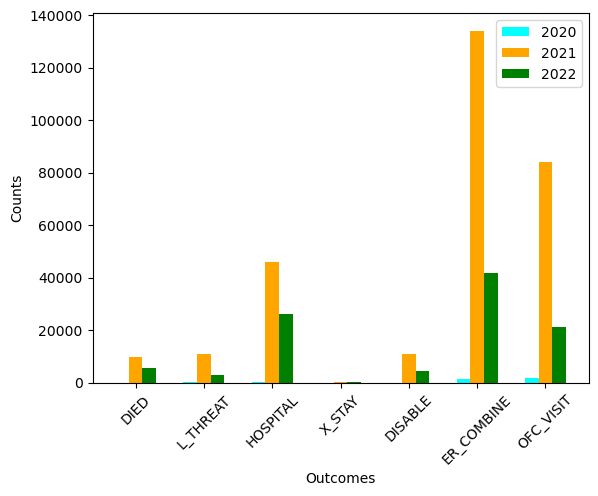

In [59]:

  
# create data
x = np.arange(7)
y1 = [16,65,139,2,10,1357,1859]
y2 = [9778,10702,45813,349,10966,134105,84091]
y3 = [5714,2788,26155,105,4528,41570,21148]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE','ER_COMBINE','OFC_VISIT'])
plt.xlabel("Outcomes")
plt.ylabel("Counts")
plt.legend(["2020", "2021", "2022"])
plt.xticks(rotation = 45)
plt.show()

In [60]:
severe_2022

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
5,1996879,DE,78.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Diarrhoea,SARS-CoV-2 test,NaN,NaN,NaN,COVID19
7,1996881,NY,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,...,2,OT,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Biopsy,Biopsy skin,Drug eruption,Rash,NaN,COVID19
15,1996889,NaN,30.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Immunisation,Lymphadenopathy,Mobility decreased,Pain,NaN,COVID19
25,1996899,NaN,40.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Headache,Immunisation,Paranasal sinus discomfort,SARS-CoV-2 test,COVID19
40,1996915,CA,76.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,Migraine,Tinnitus,NaN,NaN,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196689,2516465,NaN,NaN,U,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196692,2516469,NaN,NaN,M,NaN,NaN,NaN,NaN,Y,NaN,...,4,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),COVID-19,Interchange of vaccine products,SARS-CoV-2 test,Vaccination failure,Vaccine breakthrough infection,COVID19
196698,2516475,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196702,2516517,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,Illness,NaN,NaN,NaN,COVID19


In [61]:
severe_2022['ONSET_DATE'].value_counts()

1/1/2022      1007
12/1/2021      622
2/1/2022       566
1/10/2022      551
11/1/2021      528
              ... 
1/23/1992        1
6/13/1940        1
12/17/2020       1
10/16/1921       1
1/10/2020        1
Name: ONSET_DATE, Length: 780, dtype: int64

In [62]:
columns = ['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME']
severe_combine = pd.concat([severe_2020[columns], severe_2021[columns], severe_2022[columns]], axis = 0)

In [63]:
severe_combine['ONSET_DATE'].value_counts()

4/1/2021     3678
3/1/2021     2723
5/1/2021     2360
4/9/2021     2021
4/8/2021     1921
             ... 
11/4/2020       1
5/22/2019       1
2/16/2001       1
5/8/2020        1
5/30/2006       1
Name: ONSET_DATE, Length: 935, dtype: int64

In [64]:
severe_combine.to_csv('../data/severe_tab.csv', index=False)

In [65]:
severe_combine.STATE.value_counts()

CA    27912
MI    15646
FL    15598
TX    15299
NY    15001
      ...  
FM        3
XV        2
XL        1
Tx        1
QM        1
Name: STATE, Length: 63, dtype: int64

In [66]:
z =  severe_combine.SYMPTOM1.value_counts().to_frame()

In [67]:
z.reset_index(inplace = True)

In [68]:
z = z.loc[z['SYMPTOM1'] > 1000]

In [69]:
y =   severe_combine.SYMPTOM2.value_counts().to_frame()

In [70]:
y.reset_index(inplace = True)

In [71]:
y = y.loc[y['SYMPTOM2'] > 1000]

In [72]:
x = severe_combine.SYMPTOM3.value_counts().to_frame()

In [73]:
 x.reset_index(inplace = True)

In [74]:
x = x.loc[x['SYMPTOM3'] > 1000]

In [75]:
dfs = [x, y, z]
symptoms = ft.reduce(lambda left, right: pd.merge(left, right, on='index'), dfs)

In [76]:
symptoms

,index,SYMPTOM3,SYMPTOM2,SYMPTOM1
0,Fatigue,7166,6347,3279
1,Headache,6706,6036,3204
2,Dyspnoea,6677,6914,3573
3,Dizziness,4772,7015,8564
4,Cough,3832,6139,3053
5,Chest pain,3338,5041,4624
6,COVID-19,3320,6851,29168
7,Chills,3310,6302,7219
8,Rash,2777,3215,3213
9,Pruritus,2259,2670,2301


In [77]:
symptoms['total'] = (symptoms['SYMPTOM3'] + symptoms['SYMPTOM2'] + symptoms['SYMPTOM1'])

In [78]:
symptoms = symptoms.sort_values (by= 'total', axis=0, ascending=False, inplace=False)

In [79]:
 symptoms.reset_index(inplace= True , drop =True)

In [80]:
symptoms.to_csv('../data/symptoms_tab.csv', index=False)

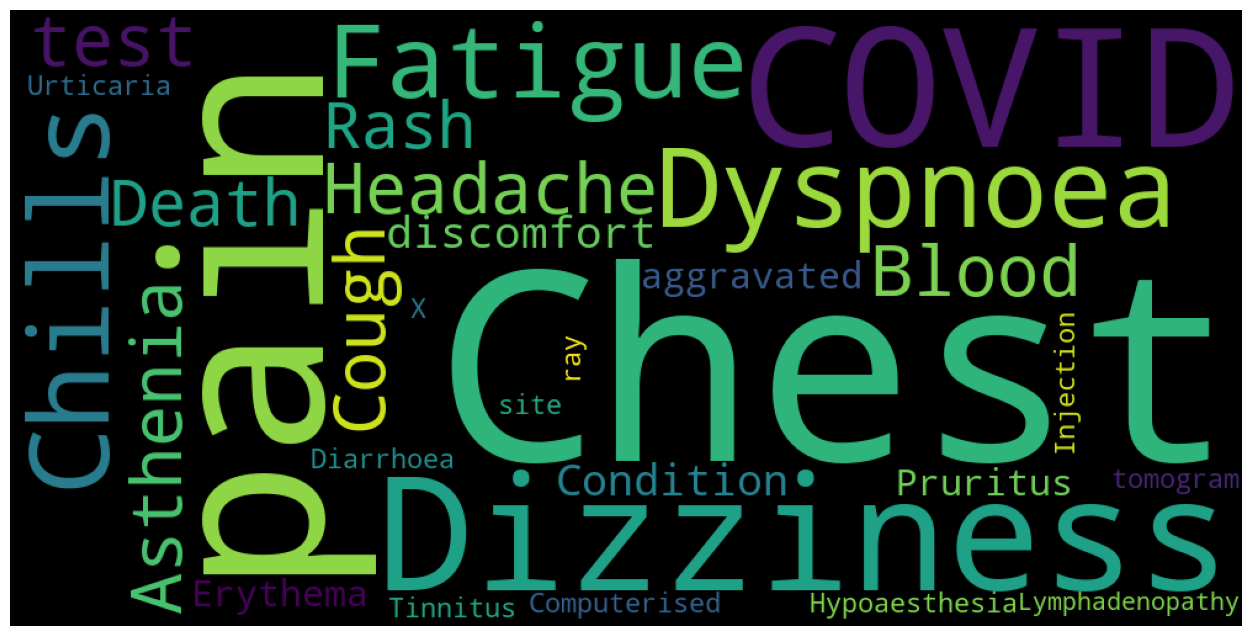

In [81]:
my_list = symptoms['index']

#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [82]:
w = severe_combine.SYMPTOM4.value_counts().to_frame()

In [83]:
w.reset_index(inplace = True)

In [84]:
w.loc[w['SYMPTOM4'] > 1000]

,index,SYMPTOM4
0,Headache,5988
1,Fatigue,5506
2,Dyspnoea,5066
3,Pain,3887
4,Pyrexia,3447
5,Dizziness,3096
6,Nausea,3056
7,SARS-CoV-2 test positive,3001
8,Pain in extremity,2716
9,Cough,2288


In [85]:
v = severe_combine.SYMPTOM5.value_counts().to_frame()

In [86]:
v.reset_index(inplace = True)

In [87]:
v.loc[v['SYMPTOM5'] > 1000]

,index,SYMPTOM5
0,Headache,4525
1,Fatigue,3991
2,Pain,3952
3,Pyrexia,3765
4,Dyspnoea,3582
5,SARS-CoV-2 test positive,2927
6,Nausea,2775
7,Pain in extremity,2503
8,Dizziness,1729
9,Electrocardiogram,1677


In [88]:
covid_states_df = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\3205005835.py:1: DtypeWarning: Columns (4,5,6,7,8,10,11,13,15,16,18,19,22,25,26,28,32,34,38,40,42,44,46,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,75,77,79,81,83,84,85,86,87,88,90,92,93,94,95,96,97,98,99,100,101,103,105,107) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_states_df = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')


In [89]:
covid_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37080 entries, 0 to 37079
Columns: 109 entries, Date to Bivalent_Booster_65Plus_Pop_Pct
dtypes: float64(22), int64(1), object(86)
memory usage: 30.8+ MB


In [90]:
covid_states_df.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Novavax',
       'Distributed_Unk_Manuf', 'Dist_Per_100K',
       ...
       'Dist_Bivalent_PFR', 'Dist_Bivalent_MOD', 'Bivalent_Booster_5Plus',
       'Bivalent_Booster_5Plus_Pop_Pct', 'Bivalent_Booster_12Plus',
       'Bivalent_Booster_12Plus_Pop_Pct', 'Bivalent_Booster_18Plus',
       'Bivalent_Booster_18Plus_Pop_Pct', 'Bivalent_Booster_65Plus',
       'Bivalent_Booster_65Plus_Pop_Pct'],
      dtype='object', length=109)

In [91]:
covid_states_manu = covid_states_df.loc[:,['Date','Location','Administered','Administered_Janssen','Administered_Moderna','Administered_Pfizer','Administered_Novavax','Administered_Unk_Manuf','Admin_Per_100K','Admin_Per_100k_5Plus','Admin_Per_100k_12Plus','Admin_Per_100k_18Plus','Admin_Per_100k_65Plus']]

In [92]:
latest_data = covid_states_manu.loc[covid_states_manu['Date']=='12/07/2022']

In [93]:
latest_data

,Date,Location,Administered,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Novavax,Administered_Unk_Manuf,Admin_Per_100K,Admin_Per_100k_5Plus,Admin_Per_100k_12Plus,Admin_Per_100k_18Plus,Admin_Per_100k_65Plus
0,12/07/2022,OH,"20,509,252","636,139","7,710,019","12,138,606","1,617","22,871","175,456","185,420","197,811","205,680","315,859"
1,12/07/2022,IA,"5,950,297","180,684","2,310,831","3,456,371",523,"1,888","188,595","199,955","214,134","222,855","352,127"
2,12/07/2022,VI,"153,128","2,351","46,947","103,823",7,0,"144,066","153,582","168,142","175,564","220,036"
3,12/07/2022,TN,"11,104,577","270,409","4,240,932","6,514,060","1,508","77,668","162,605","172,422","185,431","193,739","301,869"
4,12/07/2022,ND,"1,276,889","40,009","453,781","782,613",157,329,"167,557","179,137","191,869","198,718","313,526"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,12/07/2022,MI,"18,228,295","472,409","7,158,196","10,592,877","1,226","3,587","182,523","192,955","204,984","212,683","320,801"
60,12/07/2022,SD,"1,645,763","42,483","623,943","979,169",57,111,"186,034","198,799","213,546","221,626","340,052"
61,12/07/2022,IL,"26,117,630","687,480","9,233,184","16,159,526","2,056","35,384","206,108","217,574","229,433","235,604","329,454"
62,12/07/2022,DE,"2,023,149","63,013","774,940","1,182,475",103,"2,618","207,766","219,280","232,507","238,209","343,451"


In [94]:
total = latest_data[['Location', 'Administered']]

In [95]:
total

,Location,Administered
0,OH,"20,509,252"
1,IA,"5,950,297"
2,VI,"153,128"
3,TN,"11,104,577"
4,ND,"1,276,889"
...,...,...
59,MI,"18,228,295"
60,SD,"1,645,763"
61,IL,"26,117,630"
62,DE,"2,023,149"


In [96]:
severe_combine.columns

Index(['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME'],
      dtype='object')

In [97]:
severe_combine.STATE.value_counts()

CA    27912
MI    15646
FL    15598
TX    15299
NY    15001
      ...  
FM        3
XV        2
XL        1
Tx        1
QM        1
Name: STATE, Length: 63, dtype: int64

In [98]:
grp = severe_combine.groupby('STATE')

In [99]:
statewise = grp.count()

In [100]:
statewise.columns

Index(['VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME'],
      dtype='object')

In [101]:
statewise = statewise.loc[:,['VAERS_ID', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'OFC_VISIT', 'ER_ED_VISIT']]

In [102]:
statewise.reset_index(inplace = True, drop = False)

In [103]:
statewise

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
0,AK,871,35,37,80,67,3,30,558,340
1,AL,2234,91,157,349,269,2,155,1488,835
2,AR,2155,110,98,724,408,1,107,1141,585
3,AS,28,1,3,7,4,0,2,17,11
4,AZ,5326,127,327,770,626,11,424,3718,1951
...,...,...,...,...,...,...,...,...,...,...
58,WV,1246,70,67,348,283,3,74,676,439
59,WY,437,24,19,60,46,0,21,294,164
60,XB,6,1,1,2,2,0,1,3,5
61,XL,1,0,1,1,1,0,0,1,0


In [104]:
main_count= pd.merge(statewise,total, left_on = 'STATE',right_on ='Location',how = 'inner')

In [105]:
main_count = main_count.drop('Location',axis=1)

In [106]:
main_count.nsmallest(10,'VAERS_ID')

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
11,FM,3,0,0,2,1,0,1,1,0,"191,709"
25,MH,5,0,0,1,1,0,1,2,2,"92,665"
29,MP,25,11,2,5,4,0,0,6,7,"114,967"
3,AS,28,1,3,7,4,0,2,17,11,"114,852"
52,VI,50,0,1,4,4,0,3,40,17,"153,128"
13,GU,99,4,11,9,5,0,3,80,26,"388,371"
57,WY,437,24,19,60,46,0,21,294,164,"836,023"
8,DC,712,18,36,89,70,0,42,513,216,"1,909,510"
33,ND,743,41,29,303,267,0,27,339,271,"1,276,889"
53,VT,764,14,38,79,59,1,38,534,296,"1,697,824"


In [107]:
main_count

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,AK,871,35,37,80,67,3,30,558,340,"1,295,275"
1,AL,2234,91,157,349,269,2,155,1488,835,"6,888,090"
2,AR,2155,110,98,724,408,1,107,1141,585,"4,768,177"
3,AS,28,1,3,7,4,0,2,17,11,"114,852"
4,AZ,5326,127,327,770,626,11,424,3718,1951,"14,161,294"
5,CA,27912,648,1308,3614,2756,33,1843,19110,10465,"85,662,449"
6,CO,5718,121,311,1009,768,7,342,3729,2165,"12,682,240"
7,CT,3430,70,149,493,368,4,217,2367,1287,"8,801,850"
8,DC,712,18,36,89,70,0,42,513,216,"1,909,510"
9,DE,815,25,48,146,108,1,46,545,296,"2,023,149"


In [108]:
main_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         58 non-null     object
 1   VAERS_ID      58 non-null     int64 
 2   DIED          58 non-null     int64 
 3   L_THREAT      58 non-null     int64 
 4   HOSPITAL      58 non-null     int64 
 5   HOSPDAYS      58 non-null     int64 
 6   X_STAY        58 non-null     int64 
 7   DISABLE       58 non-null     int64 
 8   OFC_VISIT     58 non-null     int64 
 9   ER_ED_VISIT   58 non-null     int64 
 10  Administered  58 non-null     object
dtypes: int64(9), object(2)
memory usage: 5.4+ KB


In [109]:
main_count['Administered']=main_count['Administered'].str.replace(',','',regex=True)

In [110]:
main_count.Administered= main_count.Administered.astype(int)

In [111]:
main_count

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,AK,871,35,37,80,67,3,30,558,340,1295275
1,AL,2234,91,157,349,269,2,155,1488,835,6888090
2,AR,2155,110,98,724,408,1,107,1141,585,4768177
3,AS,28,1,3,7,4,0,2,17,11,114852
4,AZ,5326,127,327,770,626,11,424,3718,1951,14161294
5,CA,27912,648,1308,3614,2756,33,1843,19110,10465,85662449
6,CO,5718,121,311,1009,768,7,342,3729,2165,12682240
7,CT,3430,70,149,493,368,4,217,2367,1287,8801850
8,DC,712,18,36,89,70,0,42,513,216,1909510
9,DE,815,25,48,146,108,1,46,545,296,2023149


In [112]:
main_total = pd.DataFrame(main_count.sum(axis = 0, numeric_only = True))

In [113]:
main_total = main_total.transpose()

In [114]:
main_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,264142,11143,12796,58783,40432,359,14902,162364,92412,653808532


In [115]:
for ind, row in main_total.iterrows():
    adm = row.Administered
    main_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    main_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    main_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    main_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    main_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    main_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    main_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    main_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    main_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [116]:
main_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,40.400513,1.704322,1.957148,8.990859,6.184073,0.054909,2.279261,24.83357,14.134413,653808532


In [117]:
main_total.to_csv('../data/main_total_tab.csv', index=False)

In [118]:
for ind, row in main_count.iterrows():
    adm = row.Administered
    main_count.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    main_count.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    main_count.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    main_count.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    main_count.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    main_count.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    main_count.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    main_count.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    main_count.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [119]:
main_count

,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered
0,AK,67.244408,2.702129,2.856536,6.176295,5.172647,0.231611,2.316110,43.079655,26.249252,1295275
1,AL,32.432793,1.321121,2.279297,5.066717,3.905292,0.029036,2.250261,21.602505,12.122374,6888090
2,AR,45.195470,2.306961,2.055293,15.184000,8.556729,0.020972,2.244044,23.929481,12.268840,4768177
3,AS,24.379201,0.870686,2.612057,6.094800,3.482743,0.000000,1.741372,14.801658,9.577543,114852
4,AZ,37.609557,0.896811,2.309111,5.437356,4.420500,0.077677,2.994077,26.254663,13.776990,14161294
5,CA,32.583705,0.756457,1.526923,4.218885,3.217279,0.038523,2.151468,22.308491,12.216555,85662449
6,CO,45.086672,0.954090,2.452248,7.956008,6.055713,0.055195,2.696684,29.403323,17.071117,12682240
7,CT,38.969080,0.795287,1.692826,5.601095,4.180939,0.045445,2.465391,26.892074,14.621926,8801850
8,DC,37.287053,0.942650,1.885300,4.660882,3.665862,0.000000,2.199517,26.865531,11.311803,1909510
9,DE,40.283736,1.235697,2.372539,7.216473,5.338213,0.049428,2.273683,26.938204,14.630657,2023149


In [120]:
main_count = main_count.drop(index=[3, 8, 11,13,25,29,44,52])

In [121]:
main_count.reset_index(inplace = True, drop = True)

main_count.to_csv('../data/main_count_tab.csv', index=False)

# Creating Df for manufactures

In [122]:
m = severe_combine.groupby(['VAX_MANU','STATE']).count()

In [123]:
m

VAERS_ID  AGE_YRS  SEX  DIED  DATEDIED  L_THREAT  \
VAX_MANU             STATE                                                     
JANSSEN              AK           75       70   75     1         1         4   
                     AL          186      176  186    12        11        19   
                     AR          164      156  164     5         5         6   
                     AS            1        1    1     0         0         0   
                     AZ          420      398  420    10         7        40   
...                              ...      ...  ...   ...       ...       ...   
UNKNOWN MANUFACTURER VA           16       15   16     0         0         1   
                     WA           16       15   16     0         0         1   
                     WI           12       11   12     0         0         0   
                     WV            4        4    4     0         0         0   
                     WY            1        1    1     0         0         0   

                            ER_VISIT  HOSPITAL  HOSPDAYS  X_STAY  ...  \
VAX_MANU             STATE                                        ...   
JANSSEN              AK            0        12         9       0  ...   
                     AL            0        41        34       0  ...   
                     AR            0        52        32       0  ...   
                     AS            0         1         1       0  ...   
                     AZ            0        81        68       0  ...   
...                              ...       ...       ...     ...  ...   
UNKNOWN MANUFACTURER VA            0         2         0       0  ...   
                     WA            0         2         1       0  ...   
                     WI            0         2         1       0  ...   
                     WV            0         1         0       0  ...   
                     WY            0         0         0       0  ...   

                            VAX_DOSE_SERIES  VAX_ROUTE  VAX_SITE  VAX_NAME  \
VAX_MANU             STATE                                                   
JANSSEN              AK                  73         58        57        75   
                     AL                 176        151       149       186   
                     AR                 161        114       109       164   
                     AS                   1          0         0         1   
                     AZ                 402        344       317       420   
...                                     ...        ...       ...       ...   
UNKNOWN MANUFACTURER VA                  16         10         8        16   
                     WA                  15         10        10        16   
                     WI                  12          7         7        12   
                     WV                   4          3         3         4   
                     WY                   1          0         0         1   

                            SYMPTOM1  SYMPTOM2  SYMPTOM3  SYMPTOM4  SYMPTOM5  \
VAX_MANU             STATE                                                     
JANSSEN              AK           75        60        50        46        37   
                     AL          186       169       136       112        91   
                     AR          164       149       123       104        83   
                     AS            1         1         1         1         1   
                     AZ          420       386       334       278       236   
...                              ...       ...       ...       ...       ...   
UNKNOWN MANUFACTURER VA           16        15        12         6         5   
                     WA           16        13        10         8         7   
                     WI           12        12        10         7         7   
                     WV            4         3         1         0         0   
                     WY            1         1         1      

In [124]:
m.reset_index(inplace = True)

In [125]:
m.columns

Index(['VAX_MANU', 'STATE', 'VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED',
       'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
       'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5',
       'V_NAME'],
      dtype='object')

In [126]:
m = m.loc[:,['VAX_MANU', 'STATE','VAERS_ID', 'DIED',
       'L_THREAT', 'HOSPITAL', 'HOSPDAYS','X_STAY','DISABLE', 'OFC_VISIT', 'ER_ED_VISIT'] ]

In [127]:
m

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163
...,...,...,...,...,...,...,...,...,...,...,...
248,UNKNOWN MANUFACTURER,VA,16,0,1,2,0,0,0,5,10
249,UNKNOWN MANUFACTURER,WA,16,0,1,2,1,0,0,8,6
250,UNKNOWN MANUFACTURER,WI,12,0,0,2,1,0,0,6,7
251,UNKNOWN MANUFACTURER,WV,4,0,0,1,0,0,0,3,1


In [128]:
janssen = m.loc[m['VAX_MANU']=='JANSSEN']

In [129]:
janssen

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163
5,JANSSEN,CA,2459,67,145,392,316,7,221,1525,1064
6,JANSSEN,CO,471,9,22,83,58,2,34,288,211
7,JANSSEN,CT,303,14,17,51,38,1,15,189,126
8,JANSSEN,DC,59,2,4,8,4,0,2,38,23
9,JANSSEN,DE,66,2,5,21,15,0,5,42,21


In [130]:
janssen_adm  = latest_data[['Location', 'Administered_Janssen']]

In [131]:
janssen_adm

,Location,Administered_Janssen
0,OH,"636,139"
1,IA,"180,684"
2,VI,"2,351"
3,TN,"270,409"
4,ND,"40,009"
...,...,...
59,MI,"472,409"
60,SD,"42,483"
61,IL,"687,480"
62,DE,"63,013"


In [132]:
janssen_combine= pd.merge(janssen,janssen_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [133]:
janssen_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Location,Administered_Janssen
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34,AK,"46,262"
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82,AL,"179,555"
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54,AR,"126,022"
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0,AS,580
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163,AZ,"384,137"
5,JANSSEN,CA,2459,67,145,392,316,7,221,1525,1064,CA,"2,311,670"
6,JANSSEN,CO,471,9,22,83,58,2,34,288,211,CO,"345,891"
7,JANSSEN,CT,303,14,17,51,38,1,15,189,126,CT,"252,403"
8,JANSSEN,DC,59,2,4,8,4,0,2,38,23,DC,"39,945"
9,JANSSEN,DE,66,2,5,21,15,0,5,42,21,DE,"63,013"


In [134]:
janssen_combine['Administered_Janssen']=janssen_combine['Administered_Janssen'].str.replace(',','',regex=True)

In [135]:
janssen_combine.Administered_Janssen= janssen_combine.Administered_Janssen.astype(int)

In [136]:
janssen_total = pd.DataFrame(janssen_combine.sum(axis = 0, numeric_only = True))

In [137]:
janssen_total = janssen_total.transpose()

In [138]:
for ind, row in janssen_total.iterrows():
    adm = row.Administered_Janssen
    janssen_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    janssen_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    janssen_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    janssen_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    janssen_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    janssen_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    janssen_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    janssen_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    janssen_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [139]:
janssen_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen
0,122.481016,5.984868,7.997668,31.985318,22.552995,0.224834,8.056553,68.911631,48.938874,18680446


In [140]:
janssen_total.to_csv('../data/janssen_total_tab.csv', index=False)

In [141]:
janssen_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Location,Administered_Janssen
0,JANSSEN,AK,75,1,4,12,9,0,6,52,34,AK,46262
1,JANSSEN,AL,186,12,19,41,34,0,22,104,82,AL,179555
2,JANSSEN,AR,164,5,6,52,32,0,7,88,54,AR,126022
3,JANSSEN,AS,1,0,0,1,1,0,0,0,0,AS,580
4,JANSSEN,AZ,420,10,40,81,68,0,34,278,163,AZ,384137
5,JANSSEN,CA,2459,67,145,392,316,7,221,1525,1064,CA,2311670
6,JANSSEN,CO,471,9,22,83,58,2,34,288,211,CO,345891
7,JANSSEN,CT,303,14,17,51,38,1,15,189,126,CT,252403
8,JANSSEN,DC,59,2,4,8,4,0,2,38,23,DC,39945
9,JANSSEN,DE,66,2,5,21,15,0,5,42,21,DE,63013


In [142]:
for ind, row in janssen_combine.iterrows():
    adm = row.Administered_Janssen
    janssen_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    janssen_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    janssen_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    janssen_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    janssen_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    janssen_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    janssen_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    janssen_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    janssen_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [143]:
janssen_combine = janssen_combine.drop('Location', axis = 1)

In [144]:
janssen_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen
0,JANSSEN,AK,162.120099,2.161601,8.646405,25.939216,19.454412,0.000000,12.969608,112.403268,73.494445,46262
1,JANSSEN,AL,103.589429,6.683189,10.581716,22.834229,18.935702,0.000000,12.252513,57.920971,45.668458,179555
2,JANSSEN,AR,130.136008,3.967561,4.761073,41.262637,25.392392,0.000000,5.554586,69.829077,42.849661,126022
3,JANSSEN,AS,172.413793,0.000000,0.000000,172.413793,172.413793,0.000000,0.000000,0.000000,0.000000,580
4,JANSSEN,AZ,109.335992,2.603238,10.412952,21.086227,17.702018,0.000000,8.851009,72.370014,42.432778,384137
5,JANSSEN,CA,106.373315,2.898338,6.272522,16.957438,13.669771,0.302811,9.560188,65.969624,46.027331,2311670
6,JANSSEN,CO,136.170065,2.601976,6.360385,23.995999,16.768288,0.578217,9.829686,83.263225,61.001876,345891
7,JANSSEN,CT,120.046117,5.546685,6.735261,20.205782,15.055289,0.396192,5.942877,74.880251,49.920167,252403
8,JANSSEN,DC,147.703092,5.006884,10.013769,20.027538,10.013769,0.000000,5.006884,95.130805,57.579171,39945
9,JANSSEN,DE,104.740292,3.173948,7.934871,33.326456,23.804612,0.000000,7.934871,66.652913,33.326456,63013


In [145]:
janssen_combine = janssen_combine.drop(index=[3, 8, 12,27,42,50])

In [146]:
janssen_combine.sort_values('VAERS_ID', ascending = False, inplace = True)

In [147]:
janssen_combine.reset_index(inplace = True, drop = True)

In [148]:
janssen_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen
0,JANSSEN,KY,303.645827,39.461496,8.307683,134.999855,65.630699,0.830768,9.553836,142.892154,63.553778,240741
1,JANSSEN,MI,288.944537,21.379779,17.992883,178.447066,116.001177,0.211681,11.007411,79.592048,90.387778,472409
2,JANSSEN,MN,201.494440,6.651811,8.591922,81.484684,36.030643,0.277159,5.543176,92.571036,70.121174,360804
3,JANSSEN,MT,195.053320,15.987977,4.796393,91.131469,84.736278,1.598798,7.993989,73.544694,43.167538,62547
4,JANSSEN,RI,170.459643,4.485780,13.457340,34.390981,23.924160,0.000000,8.971560,107.658722,88.220342,66878
5,JANSSEN,AK,162.120099,2.161601,8.646405,25.939216,19.454412,0.000000,12.969608,112.403268,73.494445,46262
6,JANSSEN,WY,161.207340,10.289830,10.289830,24.009604,17.149717,0.000000,13.719774,120.048019,65.168925,29155
7,JANSSEN,WI,152.551242,11.530036,6.799765,34.885749,20.399294,0.000000,7.095407,83.075386,66.519437,338247
8,JANSSEN,WA,149.664521,3.645415,10.531198,25.112856,19.644734,0.000000,12.151382,99.438809,62.377094,493771
9,JANSSEN,TN,149.033501,28.105573,12.573546,37.720638,29.954624,0.369810,7.766014,78.399757,57.320577,270409


In [149]:
janssen_combine.to_csv('../data/janssen_combine_tab.csv', index=False)

In [150]:
pfizer = m.loc[m['VAX_MANU']=='PFIZER\BIONTECH']

In [151]:
pfizer

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
144,PFIZER\BIONTECH,AK,433,24,20,31,27,2,18,255,186
145,PFIZER\BIONTECH,AL,1067,40,82,163,133,2,77,721,407
146,PFIZER\BIONTECH,AR,976,41,48,267,182,1,66,582,318
147,PFIZER\BIONTECH,AS,19,0,3,5,3,0,1,12,8
148,PFIZER\BIONTECH,AZ,2765,52,162,384,327,1,233,1989,1019
149,PFIZER\BIONTECH,CA,14224,274,620,1782,1382,11,950,9725,5493
150,PFIZER\BIONTECH,CO,2803,46,167,535,414,3,189,1759,1123
151,PFIZER\BIONTECH,CT,1632,29,67,251,191,1,123,1130,630
152,PFIZER\BIONTECH,DC,367,8,16,41,34,0,23,268,114
153,PFIZER\BIONTECH,DE,412,13,30,75,57,1,27,268,161


In [152]:
pfizer_adm  = latest_data[['Location', 'Administered_Pfizer']]

In [153]:
pfizer_adm

,Location,Administered_Pfizer
0,OH,"12,138,606"
1,IA,"3,456,371"
2,VI,"103,823"
3,TN,"6,514,060"
4,ND,"782,613"
...,...,...
59,MI,"10,592,877"
60,SD,"979,169"
61,IL,"16,159,526"
62,DE,"1,182,475"


In [154]:
pfizer_combine= pd.merge(pfizer,pfizer_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [155]:
pfizer_combine = pfizer_combine.drop('Location',axis =1)

In [156]:
pfizer_combine['Administered_Pfizer']=pfizer_combine['Administered_Pfizer'].str.replace(',','',regex=True)

In [157]:
pfizer_combine.Administered_Pfizer= pfizer_combine.Administered_Pfizer.astype(int)

In [158]:
pfizer_total = pd.DataFrame(pfizer_combine.sum(axis = 0, numeric_only = True))

In [159]:
pfizer_total = pfizer_total.transpose()

In [160]:
for ind, row in pfizer_total.iterrows():
    adm = row.Administered_Pfizer
    pfizer_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    pfizer_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    pfizer_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    pfizer_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    pfizer_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    pfizer_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    pfizer_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    pfizer_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    pfizer_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [161]:
pfizer_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Pfizer
0,33.941824,1.299162,1.608926,7.471337,5.230038,0.045206,1.993949,20.990274,12.28065,389327926


In [162]:
pfizer_total.to_csv('../data/pfizer_total_tab.csv', index=False)

In [163]:
for ind, row in pfizer_combine.iterrows():
    adm = row.Administered_Pfizer
    pfizer_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    pfizer_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    pfizer_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    pfizer_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    pfizer_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    pfizer_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    pfizer_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    pfizer_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    pfizer_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [164]:
pfizer_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Pfizer
0,PFIZER\BIONTECH,AK,57.640801,3.194871,2.662393,4.126709,3.594230,0.266239,2.396153,33.945506,24.760252,751204
1,PFIZER\BIONTECH,AL,28.658875,1.074372,2.202463,4.378066,3.572287,0.053719,2.068166,19.365556,10.931736,3723105
2,PFIZER\BIONTECH,AR,37.474596,1.574240,1.843013,10.251759,6.988091,0.038396,2.534143,22.346532,12.209961,2604431
3,PFIZER\BIONTECH,AS,21.708827,0.000000,3.427710,5.712849,3.427710,0.000000,1.142570,13.710838,9.140559,87522
4,PFIZER\BIONTECH,AZ,33.468547,0.629427,1.960906,4.648073,3.958125,0.012104,2.820315,24.075566,12.334340,8261488
5,PFIZER\BIONTECH,CA,27.740150,0.534365,1.209146,3.475320,2.695225,0.021453,1.852724,18.966041,10.712644,51275858
6,PFIZER\BIONTECH,CO,37.197661,0.610450,2.216200,7.099803,5.494053,0.039812,2.508155,23.343092,14.902952,7535420
7,PFIZER\BIONTECH,CT,31.483577,0.559451,1.292524,4.842143,3.684659,0.019291,2.372843,21.799290,12.153587,5183655
8,PFIZER\BIONTECH,DC,31.156959,0.679171,1.358342,3.480750,2.886476,0.000000,1.952616,22.752221,9.678183,1177907
9,PFIZER\BIONTECH,DE,34.842174,1.099389,2.537052,6.342629,4.820398,0.084568,2.283346,22.664327,13.615510,1182475


In [165]:
pfizer_combine = pfizer_combine.drop(index=[3, 8, 12,24,28,43,51])

In [166]:
pfizer_combine.sort_values('VAERS_ID', ascending = False, inplace = True)

In [167]:
pfizer_combine.reset_index(inplace = True, drop = True)

In [168]:
pfizer_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Pfizer
0,PFIZER\BIONTECH,KY,73.022719,10.884013,2.118365,30.241486,11.736229,0.024349,2.020969,29.778855,19.430520,4106941
1,PFIZER\BIONTECH,MI,72.718677,2.577204,2.605524,38.119956,21.901510,0.084963,2.312875,26.546140,19.522553,10592877
2,PFIZER\BIONTECH,MT,70.550655,5.403880,2.601868,37.827160,34.724933,0.300216,1.701221,24.517604,14.010059,999282
3,PFIZER\BIONTECH,MN,64.048183,2.789829,2.095646,29.614099,16.228159,0.117880,1.899179,27.295790,21.663741,7634877
4,PFIZER\BIONTECH,AK,57.640801,3.194871,2.662393,4.126709,3.594230,0.266239,2.396153,33.945506,24.760252,751204
5,PFIZER\BIONTECH,ND,50.855276,2.683319,2.172210,24.149867,22.616542,0.000000,1.916656,21.466549,19.805447,782613
6,PFIZER\BIONTECH,NH,43.801433,4.218344,2.484778,7.685476,6.529765,0.000000,3.351561,27.737055,16.757804,1730537
7,PFIZER\BIONTECH,MO,41.305239,1.714437,1.889056,11.127968,7.365731,0.111121,2.158921,23.589387,13.842494,6299443
8,PFIZER\BIONTECH,TN,40.773343,7.245865,2.164549,8.949872,6.938837,0.030703,2.379468,22.735437,12.434641,6514060
9,PFIZER\BIONTECH,WI,40.701348,2.793504,1.759907,9.735360,5.656845,0.041903,1.815777,22.389932,16.369931,7159468


In [169]:
pfizer_combine.to_csv('../data/pfizer_combine_tab.csv', index=False)

In [170]:
moderna = m.loc[m['VAX_MANU']=='MODERNA']

In [171]:
moderna

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
57,MODERNA,AK,361,10,12,36,30,1,6,251,118
58,MODERNA,AL,978,39,55,144,101,0,56,661,346
59,MODERNA,AR,1004,64,44,396,186,0,34,468,212
60,MODERNA,AS,8,1,0,1,0,0,1,5,3
61,MODERNA,AZ,2121,64,122,297,224,10,155,1442,761
62,MODERNA,CA,11157,304,533,1421,1048,14,663,7828,3881
63,MODERNA,CO,2427,65,121,388,294,2,119,1671,827
64,MODERNA,CT,1493,27,65,190,139,2,79,1047,529
65,MODERNA,DC,282,8,16,37,29,0,16,207,79
66,MODERNA,DE,336,10,13,49,36,0,14,235,113


In [172]:
moderna_adm  = latest_data[['Location', 'Administered_Moderna']]

In [173]:
moderna_adm

,Location,Administered_Moderna
0,OH,"7,710,019"
1,IA,"2,310,831"
2,VI,"46,947"
3,TN,"4,240,932"
4,ND,"453,781"
...,...,...
59,MI,"7,158,196"
60,SD,"623,943"
61,IL,"9,233,184"
62,DE,"774,940"


In [174]:
moderna_combine= pd.merge(moderna,moderna_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [175]:
moderna_combine = moderna_combine.drop('Location', axis = 1)

In [176]:
moderna_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,MODERNA,AK,361,10,12,36,30,1,6,251,118,"496,185"
1,MODERNA,AL,978,39,55,144,101,0,56,661,346,"2,984,077"
2,MODERNA,AR,1004,64,44,396,186,0,34,468,212,"2,029,802"
3,MODERNA,AS,8,1,0,1,0,0,1,5,3,"25,476"
4,MODERNA,AZ,2121,64,122,297,224,10,155,1442,761,"5,465,788"
5,MODERNA,CA,11157,304,533,1421,1048,14,663,7828,3881,"32,054,822"
6,MODERNA,CO,2427,65,121,388,294,2,119,1671,827,"4,780,131"
7,MODERNA,CT,1493,27,65,190,139,2,79,1047,529,"3,363,899"
8,MODERNA,DC,282,8,16,37,29,0,16,207,79,"687,152"
9,MODERNA,DE,336,10,13,49,36,0,14,235,113,"774,940"


In [177]:
moderna_combine['Administered_Moderna']=moderna_combine['Administered_Moderna'].str.replace(',','',regex=True)

In [178]:
moderna_combine.Administered_Moderna= moderna_combine.Administered_Moderna.astype(int)

In [179]:
moderna_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,MODERNA,AK,361,10,12,36,30,1,6,251,118,496185
1,MODERNA,AL,978,39,55,144,101,0,56,661,346,2984077
2,MODERNA,AR,1004,64,44,396,186,0,34,468,212,2029802
3,MODERNA,AS,8,1,0,1,0,0,1,5,3,25476
4,MODERNA,AZ,2121,64,122,297,224,10,155,1442,761,5465788
5,MODERNA,CA,11157,304,533,1421,1048,14,663,7828,3881,32054822
6,MODERNA,CO,2427,65,121,388,294,2,119,1671,827,4780131
7,MODERNA,CT,1493,27,65,190,139,2,79,1047,529,3363899
8,MODERNA,DC,282,8,16,37,29,0,16,207,79,687152
9,MODERNA,DE,336,10,13,49,36,0,14,235,113,774940


In [180]:
moderna_total = pd.DataFrame(moderna_combine.sum(axis = 0, numeric_only = True))

In [181]:
moderna_total = moderna_total.transpose()

In [182]:
moderna_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,108194,4920,4962,23242,15710,138,5586,67477,35205,244891999


In [183]:
for ind, row in moderna_total.iterrows():
    adm = row.Administered_Moderna
    moderna_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    moderna_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    moderna_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    moderna_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    moderna_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    moderna_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    moderna_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    moderna_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    moderna_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [184]:
moderna_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,44.180292,2.009049,2.026199,9.490714,6.415073,0.056351,2.281006,27.553779,14.375725,244891999


In [185]:
moderna_total.to_csv('../data/moderna_total_tab.csv', index=False)

In [186]:
for ind, row in moderna_combine.iterrows():
    adm = row.Administered_Moderna
    moderna_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    moderna_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    moderna_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    moderna_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    moderna_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    moderna_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    moderna_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    moderna_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    moderna_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [187]:
moderna_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,MODERNA,AK,72.755122,2.015377,2.418453,7.255358,6.046132,0.201538,1.209226,50.585971,23.781452,496185
1,MODERNA,AL,32.773953,1.306937,1.843116,4.825613,3.384631,0.000000,1.876627,22.150903,11.594875,2984077
2,MODERNA,AR,49.462953,3.153017,2.167699,19.509292,9.163455,0.000000,1.675040,23.056436,10.444368,2029802
3,MODERNA,AS,31.402104,3.925263,0.000000,3.925263,0.000000,0.000000,3.925263,19.626315,11.775789,25476
4,MODERNA,AZ,38.805018,1.170920,2.232066,5.433800,4.098220,0.182956,2.835822,26.382289,13.922970,5465788
5,MODERNA,CA,34.805996,0.948375,1.662776,4.433030,3.269399,0.043675,2.068332,24.420663,12.107383,32054822
6,MODERNA,CO,50.772667,1.359795,2.531311,8.116932,6.150459,0.041840,2.489472,34.957201,17.300781,4780131
7,MODERNA,CT,44.383021,0.802640,1.932282,5.648208,4.132110,0.059455,2.348465,31.124597,15.725799,3363899
8,MODERNA,DC,41.038955,1.164226,2.328451,5.384544,4.220318,0.000000,2.328451,30.124339,11.496729,687152
9,MODERNA,DE,43.358195,1.290422,1.677549,6.323070,4.645521,0.000000,1.806591,30.324928,14.581774,774940


In [188]:
moderna_combine = moderna_combine.drop(index=[3, 8, 11,13,25,29,44,52])

In [189]:
moderna_combine.sort_values('VAERS_ID', ascending = False, inplace = True)

In [190]:
moderna_combine.reset_index(inplace = True, drop = True)

In [191]:
moderna_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,MODERNA,KY,93.629018,11.958326,2.405027,32.735083,16.868589,0.100209,2.171204,47.966918,21.411417,2993730
1,MODERNA,MI,91.447622,4.875530,2.905760,54.077871,29.979621,0.125730,2.207260,27.604721,21.080730,7158196
2,MODERNA,MT,82.114596,7.789005,2.508324,33.136276,30.363918,0.000000,1.980256,36.304685,20.726675,757478
3,MODERNA,MN,74.547641,5.135707,2.099934,31.635956,15.886454,0.045651,2.373838,31.476178,23.784030,4381091
4,MODERNA,AK,72.755122,2.015377,2.418453,7.255358,6.046132,0.201538,1.209226,50.585971,23.781452,496185
5,MODERNA,ND,68.755633,3.525930,2.424077,22.698174,18.070391,0.000000,2.424077,33.716705,22.918544,453781
6,MODERNA,SD,67.474112,20.514694,3.045150,21.155779,18.591442,0.320542,1.602711,34.458276,24.200929,623943
7,MODERNA,NH,60.662330,1.044265,2.278397,6.075726,5.221327,0.000000,4.082129,41.295952,25.347171,1053372
8,MODERNA,WY,59.107477,4.378332,2.189166,8.483018,6.567497,0.000000,3.010103,36.394882,19.428847,365436
9,MODERNA,OR,54.997733,1.181769,3.030178,6.575487,4.848285,0.000000,3.545308,39.058996,18.908312,3300136


In [192]:
moderna_combine.to_csv('../data/moderna_combine_tab.csv', index=False)

In [193]:
novavax = m.loc[m['VAX_MANU']=='NOVAVAX']

In [194]:
novavax

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
117,NOVAVAX,AK,1,0,0,1,1,0,0,0,1
118,NOVAVAX,AZ,1,0,0,0,0,0,1,1,0
119,NOVAVAX,CA,9,0,0,0,0,0,1,8,3
120,NOVAVAX,CO,1,0,0,0,0,0,0,1,0
121,NOVAVAX,DC,1,0,0,0,0,0,1,0,0
122,NOVAVAX,FL,3,0,0,1,0,0,0,2,1
123,NOVAVAX,GA,2,0,0,0,0,0,0,2,1
124,NOVAVAX,IL,1,0,0,0,0,0,1,1,0
125,NOVAVAX,IN,1,0,0,0,0,0,0,1,0
126,NOVAVAX,KS,2,0,0,0,0,0,1,1,1


In [195]:
novavax_adm  = latest_data[['Location', 'Administered_Novavax']]

In [196]:
novavax_combine= pd.merge(novavax,novavax_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [197]:
novavax_combine = novavax_combine.drop('Location', axis = 1)

In [198]:
novavax_combine['Administered_Novavax']=novavax_combine['Administered_Novavax'].str.replace(',','',regex=True)

In [199]:
novavax_combine.Administered_Novavax= novavax_combine.Administered_Novavax.astype(int)

In [200]:
novavax_total = pd.DataFrame(novavax_combine.sum(axis = 0, numeric_only = True))
novavax_total.transpose()

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Novavax
0,54,0,4,11,4,1,7,35,18,45601


In [201]:
for ind, row in novavax_combine.iterrows():
    adm = row.Administered_Novavax
    novavax_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    novavax_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    novavax_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    novavax_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    novavax_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    novavax_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    novavax_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    novavax_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    novavax_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [202]:
novavax_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Novavax
0,NOVAVAX,AK,427.350427,0,0.000000,427.350427,427.350427,0.000000,0.000000,0.000000,427.350427,234
1,NOVAVAX,AZ,65.832785,0,0.000000,0.000000,0.000000,0.000000,65.832785,65.832785,0.000000,1519
2,NOVAVAX,CA,118.639599,0,0.000000,0.000000,0.000000,0.000000,13.182178,105.457422,39.546533,7586
3,NOVAVAX,CO,44.326241,0,0.000000,0.000000,0.000000,0.000000,0.000000,44.326241,0.000000,2256
4,NOVAVAX,DC,578.034682,0,0.000000,0.000000,0.000000,0.000000,578.034682,0.000000,0.000000,173
5,NOVAVAX,FL,94.577554,0,0.000000,31.525851,0.000000,0.000000,0.000000,63.051702,31.525851,3172
6,NOVAVAX,GA,131.752306,0,0.000000,0.000000,0.000000,0.000000,0.000000,131.752306,65.876153,1518
7,NOVAVAX,IL,48.638132,0,0.000000,0.000000,0.000000,0.000000,48.638132,48.638132,0.000000,2056
8,NOVAVAX,IN,217.391304,0,0.000000,0.000000,0.000000,0.000000,0.000000,217.391304,0.000000,460
9,NOVAVAX,KS,338.983051,0,0.000000,0.000000,0.000000,0.000000,169.491525,169.491525,169.491525,590


In [203]:
novavax_combine.to_csv('../data/presentation4.csv', index=False)

In [204]:
unk_manu = m.loc[m['VAX_MANU']=='UNKNOWN MANUFACTURER']

In [205]:
unk_manu

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT
204,UNKNOWN MANUFACTURER,AK,1,0,1,0,0,0,0,0,1
205,UNKNOWN MANUFACTURER,AL,3,0,1,1,1,0,0,2,0
206,UNKNOWN MANUFACTURER,AR,11,0,0,9,8,0,0,3,1
207,UNKNOWN MANUFACTURER,AZ,19,1,3,8,7,0,1,8,8
208,UNKNOWN MANUFACTURER,CA,63,3,10,19,10,1,8,24,24
209,UNKNOWN MANUFACTURER,CO,16,1,1,3,2,0,0,10,4
210,UNKNOWN MANUFACTURER,CT,2,0,0,1,0,0,0,1,2
211,UNKNOWN MANUFACTURER,DC,3,0,0,3,3,0,0,0,0
212,UNKNOWN MANUFACTURER,DE,1,0,0,1,0,0,0,0,1
213,UNKNOWN MANUFACTURER,FL,28,4,6,11,4,0,1,14,9


In [206]:
unk_adm  = latest_data[['Location', 'Administered_Unk_Manuf']]

In [207]:
unk_combine= pd.merge(unk_manu,unk_adm ,left_on = 'STATE', right_on = 'Location', how ='inner')

In [208]:
unk_combine = unk_combine.drop('Location', axis = 1)

In [209]:
unk_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Unk_Manuf
0,UNKNOWN MANUFACTURER,AK,1,0,1,0,0,0,0,0,1,"1,390"
1,UNKNOWN MANUFACTURER,AL,3,0,1,1,1,0,0,2,0,829
2,UNKNOWN MANUFACTURER,AR,11,0,0,9,8,0,0,3,1,"4,481"
3,UNKNOWN MANUFACTURER,AZ,19,1,3,8,7,0,1,8,8,"48,362"
4,UNKNOWN MANUFACTURER,CA,63,3,10,19,10,1,8,24,24,"12,513"
5,UNKNOWN MANUFACTURER,CO,16,1,1,3,2,0,0,10,4,"18,542"
6,UNKNOWN MANUFACTURER,CT,2,0,0,1,0,0,0,1,2,"1,303"
7,UNKNOWN MANUFACTURER,DC,3,0,0,3,3,0,0,0,0,"4,333"
8,UNKNOWN MANUFACTURER,DE,1,0,0,1,0,0,0,0,1,"2,618"
9,UNKNOWN MANUFACTURER,FL,28,4,6,11,4,0,1,14,9,"169,724"


In [210]:
unk_combine['Administered_Unk_Manuf']=unk_combine['Administered_Unk_Manuf'].str.replace(',','',regex=True)

In [211]:
unk_combine.Administered_Unk_Manuf = unk_combine.Administered_Unk_Manuf.astype(int)

In [212]:
unk_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   VAX_MANU                49 non-null     object
 1   STATE                   49 non-null     object
 2   VAERS_ID                49 non-null     int64 
 3   DIED                    49 non-null     int64 
 4   L_THREAT                49 non-null     int64 
 5   HOSPITAL                49 non-null     int64 
 6   HOSPDAYS                49 non-null     int64 
 7   X_STAY                  49 non-null     int64 
 8   DISABLE                 49 non-null     int64 
 9   OFC_VISIT               49 non-null     int64 
 10  ER_ED_VISIT             49 non-null     int64 
 11  Administered_Unk_Manuf  49 non-null     int32 
dtypes: int32(1), int64(9), object(2)
memory usage: 4.8+ KB


In [213]:
for ind, row in unk_combine.iterrows():
    adm = row.Administered_Unk_Manuf
    unk_combine.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    unk_combine.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    unk_combine.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    unk_combine.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    unk_combine.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    unk_combine.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    unk_combine.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    unk_combine.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    unk_combine.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [214]:
unk_combine

,VAX_MANU,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Unk_Manuf
0,UNKNOWN MANUFACTURER,AK,71.942446,0.000000,71.942446,0.000000,0.000000,0.000000,0.000000,0.000000,71.942446,1390
1,UNKNOWN MANUFACTURER,AL,361.881785,0.000000,120.627262,120.627262,120.627262,0.000000,0.000000,241.254524,0.000000,829
2,UNKNOWN MANUFACTURER,AR,245.480919,0.000000,0.000000,200.848025,178.531578,0.000000,0.000000,66.949342,22.316447,4481
3,UNKNOWN MANUFACTURER,AZ,39.287044,2.067739,6.203217,16.541913,14.474174,0.000000,2.067739,16.541913,16.541913,48362
4,UNKNOWN MANUFACTURER,CA,503.476385,23.975066,79.916886,151.842084,79.916886,7.991689,63.933509,191.800527,191.800527,12513
5,UNKNOWN MANUFACTURER,CO,86.290584,5.393161,5.393161,16.179484,10.786323,0.000000,0.000000,53.931615,21.572646,18542
6,UNKNOWN MANUFACTURER,CT,153.491942,0.000000,0.000000,76.745971,0.000000,0.000000,0.000000,76.745971,153.491942,1303
7,UNKNOWN MANUFACTURER,DC,69.236095,0.000000,0.000000,69.236095,69.236095,0.000000,0.000000,0.000000,0.000000,4333
8,UNKNOWN MANUFACTURER,DE,38.197097,0.000000,0.000000,38.197097,0.000000,0.000000,0.000000,0.000000,38.197097,2618
9,UNKNOWN MANUFACTURER,FL,16.497372,2.356767,3.535151,6.481111,2.356767,0.000000,0.589192,8.248686,5.302727,169724


In [215]:
severe_combine

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19
5,902468,NaN,59.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Chills,Defaecation urgency,Diarrhoea,Dizziness,COVID19
6,902479,KS,46.0,F,NaN,NaN,NaN,NaN,Y,1.0,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest pain,Feeling abnormal,Flushing,Intensive care,NaN,COVID19
8,902491,NE,41.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Dyspnoea,Erythema,Headache,COVID19
9,902492,AR,44.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Feeling hot,Nausea,Visual impairment,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196689,2516465,NaN,NaN,U,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196692,2516469,NaN,NaN,M,NaN,NaN,NaN,NaN,Y,NaN,...,4,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),COVID-19,Interchange of vaccine products,SARS-CoV-2 test,Vaccination failure,Vaccine breakthrough infection,COVID19
196698,2516475,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19
196702,2516517,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,Illness,NaN,NaN,NaN,COVID19


In [216]:
new_df=  latest_data[['Location', 'Administered']]

In [217]:
severe_combine_adm = pd.merge(severe_combine,new_df, left_on = 'STATE', right_on= 'Location', how='inner')

In [218]:
final_data = severe_combine_adm[severe_combine_adm['VAX_MANU'].isin(['PFIZER\\BIONTECH','MODERNA','JANSSEN'])]

In [219]:
final_data

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME,Location,Administered
0,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19,LA,"6,828,642"
1,903568,LA,49.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Ageusia,Anosmia,Asthenia,Back pain,Blood glucose normal,COVID19,LA,"6,828,642"
2,903588,LA,69.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Hypoaesthesia,Hypoaesthesia oral,NaN,NaN,NaN,COVID19,LA,"6,828,642"
3,904498,LA,43.0,M,NaN,NaN,Y,NaN,NaN,NaN,...,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Cardioversion,Ventricular tachycardia,NaN,NaN,NaN,COVID19,LA,"6,828,642"
4,905018,LA,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Anosmia,Respiratory tract congestion,Rhinorrhoea,SARS-CoV-2 test negative,NaN,COVID19,LA,"6,828,642"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264137,1392086,MH,49.0,M,NaN,NaN,NaN,NaN,Y,3.0,...,LA,COVID19 (COVID19 (MODERNA)),Cardiac stress test normal,Chest discomfort,Chest pain,Chills,Echocardiogram normal,COVID19,MH,"92,665"
264138,1535345,MH,69.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Arthritis,Pain,Peripheral swelling,Polyarthritis,Tinnitus,COVID19,MH,"92,665"
264139,1064355,FM,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,LA,COVID19 (COVID19 (MODERNA)),Vision blurred,Visual acuity tests abnormal,Visual impairment,Vitreous floaters,NaN,COVID19,FM,"191,709"
264140,1206410,FM,19.0,M,NaN,NaN,NaN,NaN,Y,5.0,...,LA,COVID19 (COVID19 (MODERNA)),Basophil count decreased,Eosinophil count normal,Headache,Lymphocyte count decreased,Monocyte count normal,COVID19,FM,"191,709"


In [220]:
final_data.VAX_MANU.unique()

array(['PFIZER\\BIONTECH', 'MODERNA', 'JANSSEN'], dtype=object)

In [221]:
nationwide_gender =severe_combine_adm.groupby(by= "SEX")

In [222]:
nationwide_gender.count()

,VAERS_ID,STATE,AGE_YRS,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,...,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME,Location,Administered
SEX,,,,,,,,,,,,,,,,,,,,,
F,175108,175108,172325,4832,4535,6774,71,30267,21041,198,...,143598,175108,175108,157281,134587,111083,90604,175108,175108,175108
M,87318,87318,85608,6105,5778,5920,34,28035,19251,155,...,65449,87318,87318,76008,62874,51052,41421,87318,87318,87318
U,1716,1716,882,206,61,102,2,481,140,6,...,753,1716,1716,1286,949,703,543,1716,1716,1716


In [223]:
manu_gender = severe_combine.groupby(['VAX_MANU','STATE','SEX']).count()

In [224]:
manu_gender.reset_index(inplace =True)

In [225]:
manu_gender

,VAX_MANU,STATE,SEX,VAERS_ID,AGE_YRS,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,JANSSEN,AK,F,42,40,1,1,1,0,4,...,42,34,33,42,42,35,28,26,23,42
1,JANSSEN,AK,M,32,30,0,0,3,0,7,...,30,24,24,32,32,24,21,20,14,32
2,JANSSEN,AK,U,1,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,0,1
3,JANSSEN,AL,F,101,97,6,5,7,0,17,...,95,85,82,101,101,95,77,59,45,101
4,JANSSEN,AL,M,83,78,6,6,12,0,24,...,79,66,67,83,83,72,58,52,45,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,UNKNOWN MANUFACTURER,WI,F,10,9,0,0,0,0,1,...,10,5,5,10,10,10,8,7,7,10
624,UNKNOWN MANUFACTURER,WI,M,2,2,0,0,0,0,1,...,2,2,2,2,2,2,2,0,0,2
625,UNKNOWN MANUFACTURER,WV,F,3,3,0,0,0,0,1,...,3,3,3,3,3,3,1,0,0,3
626,UNKNOWN MANUFACTURER,WV,M,1,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [226]:
manu_gender.to_csv('../data/manu_gen_tab.csv', index=False)

In [227]:
jenssen_gender = manu_gender.loc[manu_gender['VAX_MANU']=='JANSSEN']

In [228]:
janssen_gen = pd.merge(jenssen_gender,janssen_adm,left_on= 'STATE',right_on = 'Location',how = 'inner')

In [229]:
janssen_gen

,VAX_MANU,STATE,SEX,VAERS_ID,AGE_YRS,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME,Location,Administered_Janssen
0,JANSSEN,AK,F,42,40,1,1,1,0,4,...,33,42,42,35,28,26,23,42,AK,"46,262"
1,JANSSEN,AK,M,32,30,0,0,3,0,7,...,24,32,32,24,21,20,14,32,AK,"46,262"
2,JANSSEN,AK,U,1,0,0,0,0,0,1,...,0,1,1,1,1,0,0,1,AK,"46,262"
3,JANSSEN,AL,F,101,97,6,5,7,0,17,...,82,101,101,95,77,59,45,101,AL,"179,555"
4,JANSSEN,AL,M,83,78,6,6,12,0,24,...,67,83,83,72,58,52,45,83,AL,"179,555"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,JANSSEN,WV,M,40,36,5,5,4,0,17,...,25,40,40,37,30,23,17,40,WV,"68,450"
151,JANSSEN,WV,U,2,0,0,0,0,0,1,...,0,2,2,1,1,1,1,2,WV,"68,450"
152,JANSSEN,WY,F,30,29,2,2,1,0,4,...,22,30,30,27,23,17,13,30,WY,"29,155"
153,JANSSEN,WY,M,15,15,1,1,2,0,3,...,13,15,15,14,13,11,7,15,WY,"29,155"


In [230]:
janssen_gen = janssen_gen.loc[:,['STATE','SEX','VAERS_ID', 'DIED','L_THREAT','HOSPITAL','HOSPDAYS','X_STAY','DISABLE','OFC_VISIT','ER_ED_VISIT','Administered_Janssen']]

In [231]:
janssen_gen.to_csv('../data/janssen_gender_tab.csv', index=False)

In [232]:
janssen_gen['Administered_Janssen']=janssen_gen['Administered_Janssen'].str.replace(',','',regex=True)


In [233]:
janssen_gen['Administered_Janssen']=janssen_gen['Administered_Janssen'].astype(int)

In [234]:
for ind, row in janssen_gen.iterrows():
    adm = row.Administered_Janssen
    janssen_gen.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    janssen_gen.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    janssen_gen.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    janssen_gen.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    janssen_gen.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    janssen_gen.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    janssen_gen.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    janssen_gen.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    janssen_gen.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [235]:
#pick top 5 states by %varsid 

top_state = janssen_gen.groupby(['STATE']).agg({'VAERS_ID':'sum'})
top_state.sort_values(['VAERS_ID'],ascending=False).head(10).index

Index(['KY', 'MI', 'MN', 'MT', 'AS', 'RI', 'AK', 'WY', 'WI', 'WA'], dtype='object', name='STATE')

In [236]:
# top 10 states = ['KY', 'MI', 'MN', 'MT', 'RI', 'AK', 'WY', 'WI', 'WA']
janssen_gen[janssen_gen['STATE'].isin( ['KY', 'MI', 'MN', 'MT', 'RI'])]

,STATE,SEX,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen
51,KY,F,161.169057,18.692288,2.492305,62.307625,27.415355,0.830768,6.230763,83.492218,33.646118,240741
52,KY,M,141.230617,20.769208,5.815378,72.692229,38.215343,0.000000,3.323073,58.569168,29.492276,240741
53,KY,U,1.246153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830768,0.415384,240741
66,MI,F,153.045348,7.408834,7.620515,85.095754,56.307141,0.000000,6.773791,51.015116,51.861840,472409
67,MI,M,134.629103,13.759264,10.372368,92.927950,59.270674,0.211681,4.233620,28.153570,38.314257,472409
68,MI,U,1.270086,0.211681,0.000000,0.423362,0.423362,0.000000,0.000000,0.423362,0.211681,472409
69,MN,F,108.646246,3.048747,4.434541,36.862119,17.183845,0.277159,3.603064,57.371869,38.802231,360804
70,MN,M,90.630924,3.603064,4.157382,42.959612,18.569639,0.000000,1.940112,34.644849,31.318943,360804
71,MN,U,2.217270,0.000000,0.000000,1.662953,0.277159,0.000000,0.000000,0.554318,0.000000,360804
80,MT,F,103.921851,7.993989,1.598798,44.766336,39.969943,0.000000,4.796393,41.568740,25.580763,62547


In [237]:
janssen_gen[janssen_gen['SEX']=='M']['VAERS_ID'].max()

172.41379310344828

In [238]:
grouped_rank = janssen_gen.groupby(by=['SEX','VAERS_ID','STATE']).agg({'VAERS_ID':'sum'}).rank(method='dense',ascending=False)

In [239]:
janssen_gen['rank'] = janssen_gen.sort_values(['VAERS_ID'],ascending=False).groupby(['SEX']).cumcount()+1

In [240]:
janssen_gen[janssen_gen['rank']<=5].sort_values(['rank','SEX'])

,STATE,SEX,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen,rank
51,KY,F,161.169057,18.692288,2.492305,62.307625,27.415355,0.830768,6.230763,83.492218,33.646118,240741,1
9,AS,M,172.413793,0.000000,0.000000,172.413793,172.413793,0.000000,0.000000,0.000000,0.000000,580,1
76,MP,U,71.479628,71.479628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1399,1
66,MI,F,153.045348,7.408834,7.620515,85.095754,56.307141,0.000000,6.773791,51.015116,51.861840,472409,2
52,KY,M,141.230617,20.769208,5.815378,72.692229,38.215343,0.000000,3.323073,58.569168,29.492276,240741,2
154,WY,U,6.859887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.429943,3.429943,29155,2
119,RI,F,112.144502,0.000000,4.485780,13.457340,10.466820,0.000000,4.485780,86.725081,49.343581,66878,3
67,MI,M,134.629103,13.759264,10.372368,92.927950,59.270674,0.211681,4.233620,28.153570,38.314257,472409,3
82,MT,U,3.197595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.598798,1.598798,62547,3
69,MN,F,108.646246,3.048747,4.434541,36.862119,17.183845,0.277159,3.603064,57.371869,38.802231,360804,4


In [241]:
janssen_gen.describe()

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen,rank
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.550000e+02,155.000000
mean,46.831306,2.904285,2.894784,12.405345,9.104493,0.081188,2.808556,25.949271,18.321347,3.576941e+05,26.503226
std,37.358672,6.681476,2.516515,19.243793,16.227939,0.282463,2.376313,21.529631,14.508189,4.442116e+05,15.244916
min,0.289108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+02,1.000000
25%,2.619223,0.000000,0.000000,0.714517,0.241563,0.000000,0.000000,1.083607,1.083607,9.019800e+04,13.500000
50%,48.703814,1.600047,3.173948,9.474495,7.252180,0.000000,3.128674,25.213232,20.027538,2.336120e+05,26.000000
75%,71.244568,3.173999,4.741992,15.130739,11.326462,0.000000,4.539449,41.754006,27.811464,3.964320e+05,39.000000
max,172.413793,71.479628,10.372368,172.413793,172.413793,2.217344,9.415531,86.725081,71.479628,2.311670e+06,56.000000


In [242]:
jg = janssen_gen.groupby('SEX').sum()

In [243]:
jg

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Janssen,rank
SEX,,,,,,,,,,,
F,4095.229446,158.530733,198.449838,827.100421,589.440317,4.692823,225.398229,2524.420379,1618.312779,18676116,1431
M,3019.598901,210.553224,243.922951,1074.814110,814.267533,7.891354,206.553978,1472.042228,1193.239573,18680446,1596
U,144.024144,81.080287,6.318731,20.913938,7.488553,0.000000,3.374014,25.674326,28.256359,18086016,1081


In [244]:
pfizer_gender = manu_gender.loc[manu_gender['VAX_MANU']=='PFIZER\BIONTECH']

In [245]:
pfizer_gen = pd.merge(pfizer_gender,pfizer_adm,left_on= 'STATE',right_on = 'Location',how = 'inner')

In [246]:
pfizer_gen = pfizer_gen.loc[:,['STATE','SEX','VAERS_ID', 'DIED','L_THREAT','HOSPITAL','HOSPDAYS','X_STAY','DISABLE','OFC_VISIT','ER_ED_VISIT','Administered_Pfizer']]

In [247]:
pfizer_gen.to_csv('../data/Pfizer_gender_tab2.csv', index=False)

In [248]:
pfizer_gen['Administered_Pfizer']=pfizer_gen['Administered_Pfizer'].str.replace(',','',regex=True)


In [249]:
pfizer_gen['Administered_Pfizer']=pfizer_gen['Administered_Pfizer'].astype(int)

In [250]:

for ind, row in pfizer_gen.iterrows():
    adm = row.Administered_Pfizer
    pfizer_gen.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    pfizer_gen.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    pfizer_gen.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    pfizer_gen.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    pfizer_gen.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    pfizer_gen.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    pfizer_gen.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    pfizer_gen.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    pfizer_gen.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*10000

In [251]:
pfizer_gen

,STATE,SEX,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Pfizer
0,AK,F,39.669650,1.331196,1.464316,2.129914,1.730555,0.266239,1.064957,22.497218,1.850363,751204
1,AK,M,17.704911,1.863675,1.198077,1.996794,1.863675,0.000000,1.331196,11.315169,0.599038,751204
2,AK,U,0.266239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133120,0.026624,751204
3,AL,F,19.392416,0.537186,1.154950,2.175603,1.772714,0.053719,1.074372,13.563947,0.725201,3723105
4,AL,M,9.078444,0.510327,1.047513,2.202463,1.799573,0.000000,0.966935,5.667313,0.362601,3723105
...,...,...,...,...,...,...,...,...,...,...,...,...
160,WV,F,24.361738,0.661677,1.383506,5.834787,4.812195,0.060152,1.022591,13.594451,0.950409,1662443
161,WV,M,12.932774,1.022591,0.781982,4.812195,3.970061,0.060152,1.022591,6.797226,0.421067,1662443
162,WV,U,0.240610,0.060152,0.000000,0.120305,0.000000,0.000000,0.000000,0.120305,0.006015,1662443
163,WY,F,24.753375,0.227095,0.908381,2.270952,2.043857,0.000000,0.681286,19.530185,1.044638,440344


In [252]:
#pick top 5 states by %varsid 

top_state_pfizer = pfizer_gen.groupby(['STATE']).agg({'VAERS_ID':'sum'})
top_state_pfizer.sort_values(['VAERS_ID'],ascending=False).head(10).index

Index(['KY', 'MI', 'MT', 'MN', 'AK', 'ND', 'NH', 'MO', 'TN', 'WI'], dtype='object', name='STATE')

In [253]:
pfizer_gen[pfizer_gen['STATE'].isin( ['KY', 'MI', 'MT', 'MN', 'AK', 'ND', 'NH', 'MO', 'TN', 'WI'])]

,STATE,SEX,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Pfizer
0,AK,F,39.669650,1.331196,1.464316,2.129914,1.730555,0.266239,1.064957,22.497218,1.850363,751204
1,AK,M,17.704911,1.863675,1.198077,1.996794,1.863675,0.000000,1.331196,11.315169,0.599038,751204
2,AK,U,0.266239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133120,0.026624,751204
55,KY,F,43.560402,5.259389,1.290498,15.072045,5.673322,0.000000,1.144404,19.625312,1.232061,4106941
56,KY,M,28.585753,5.600275,0.779169,14.901602,6.038558,0.000000,0.827867,9.861354,0.669598,4106941
57,KY,U,0.876565,0.024349,0.048698,0.267839,0.024349,0.024349,0.048698,0.292188,0.041393,4106941
72,MI,F,44.312796,1.189479,1.331083,19.399829,11.300046,0.028321,1.444367,18.927813,1.273497,10592877
73,MI,M,28.066030,1.340523,1.274441,18.587962,10.601464,0.056642,0.859068,7.476722,0.674038,10592877
74,MI,U,0.339851,0.047202,0.000000,0.132164,0.000000,0.000000,0.009440,0.141605,0.004720,10592877
75,MN,F,38.337225,1.349072,1.100214,14.315882,8.133726,0.052391,1.178801,18.860815,1.326806,7634877


In [254]:
moderna_gender = manu_gender.loc[manu_gender['VAX_MANU']=='MODERNA']

In [255]:
moderna_gen = pd.merge(moderna_gender,moderna_adm,left_on= 'STATE',right_on = 'Location',how = 'inner')

In [256]:
moderna_gen = moderna_gen.loc[:,['STATE','SEX','VAERS_ID', 'DIED','L_THREAT','HOSPITAL','HOSPDAYS','X_STAY','DISABLE','OFC_VISIT','ER_ED_VISIT','Administered_Moderna']]

In [257]:
moderna_gen.to_csv('../data/moderna_gen_tab.csv', index=False)

In [258]:
moderna_gen['Administered_Moderna']=moderna_gen['Administered_Moderna'].str.replace(',','',regex=True)

In [259]:
moderna_gen['Administered_Moderna']=moderna_gen['Administered_Moderna'].astype(int)

In [260]:
for ind, row in moderna_gen.iterrows():
    adm = row.Administered_Moderna
    moderna_gen.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    moderna_gen.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    moderna_gen.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    moderna_gen.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    moderna_gen.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    moderna_gen.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    moderna_gen.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    moderna_gen.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    moderna_gen.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*10000

In [261]:
moderna_gen

,STATE,SEX,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,AK,F,53.609037,0.604613,1.410764,4.635368,4.232292,0.000000,1.007689,38.695245,1.672763,496185
1,AK,M,19.146085,1.410764,1.007689,2.619991,1.813840,0.201538,0.201538,11.890726,0.705382,496185
2,AL,F,22.150903,0.469157,0.904802,2.647385,1.776094,0.000000,1.139381,15.515685,0.743949,2984077
3,AL,M,10.489005,0.804269,0.938314,2.178228,1.608538,0.000000,0.737246,6.534684,0.412188,2984077
4,AL,U,0.134045,0.033511,0.000000,0.000000,0.000000,0.000000,0.000000,0.100534,0.003351,2984077
...,...,...,...,...,...,...,...,...,...,...,...,...
160,WV,M,11.501414,1.447198,0.380842,4.265425,3.427574,0.000000,0.761683,4.722435,0.365608,1312882
161,WV,U,0.228505,0.000000,0.000000,0.076168,0.000000,0.000000,0.076168,0.152337,0.007617,1312882
162,WY,F,39.678630,2.189166,1.094583,5.199269,3.831040,0.000000,1.915520,25.175407,1.258770,365436
163,WY,M,19.155201,2.189166,1.094583,3.010103,2.736457,0.000000,1.094583,11.219475,0.684114,365436


In [262]:
#pick top 5 states by %varsid 

top_state_moderna = moderna_gen.groupby(['STATE']).agg({'VAERS_ID':'sum'})
top_state_moderna.sort_values(['VAERS_ID'],ascending=False).head(10).index

Index(['KY', 'MI', 'MT', 'MN', 'AK', 'ND', 'SD', 'MP', 'NH', 'WY'], dtype='object', name='STATE')

In [263]:
moderna_gen[moderna_gen['STATE'].isin( ['KY', 'MI', 'MT', 'MN', 'AK', 'ND', 'SD', 'MP', 'NH', 'WY'])]

,STATE,SEX,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,Administered_Moderna
0,AK,F,53.609037,0.604613,1.410764,4.635368,4.232292,0.000000,1.007689,38.695245,1.672763,496185
1,AK,M,19.146085,1.410764,1.007689,2.619991,1.813840,0.201538,0.201538,11.890726,0.705382,496185
55,KY,F,58.689327,4.375812,1.636754,17.202620,8.952043,0.100209,1.336126,34.004403,1.409613,2993730
56,KY,M,34.572256,7.415498,0.768272,15.465657,7.883142,0.000000,0.835079,13.828902,0.728189,2993730
57,KY,U,0.367435,0.167016,0.000000,0.066806,0.033403,0.000000,0.000000,0.133613,0.003340,2993730
72,MI,F,53.253641,2.039620,1.620520,26.878281,15.059660,0.041910,1.369060,19.879310,1.339723,7158196
73,MI,M,37.844731,2.794000,1.285240,26.990041,14.864080,0.083820,0.838200,7.655560,0.762762,7158196
74,MI,U,0.349250,0.041910,0.000000,0.209550,0.055880,0.000000,0.000000,0.069850,0.005588,7158196
75,MN,F,44.258382,2.077108,0.981491,14.996265,7.760624,0.000000,1.460823,22.072128,1.415173,4381091
76,MN,M,29.558847,3.058599,1.118443,16.091882,8.125830,0.022825,0.890189,9.289923,0.951818,4381091


In [264]:
severe_combine.columns


Index(['VAERS_ID', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED', 'L_THREAT',
       'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
       'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME'],
      dtype='object')

In [265]:
bins = [0, 5, 12, 18, 65,150]
severe_combine['binned'] = pd.cut(severe_combine['AGE_YRS'], bins)


In [266]:
severe_combine

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME,binned
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19,"(18.0, 65.0]"
5,902468,NaN,59.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Chills,Defaecation urgency,Diarrhoea,Dizziness,COVID19,"(18.0, 65.0]"
6,902479,KS,46.0,F,NaN,NaN,NaN,NaN,Y,1.0,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest pain,Feeling abnormal,Flushing,Intensive care,NaN,COVID19,"(18.0, 65.0]"
8,902491,NE,41.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Dyspnoea,Erythema,Headache,COVID19,"(18.0, 65.0]"
9,902492,AR,44.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Feeling hot,Nausea,Visual impairment,COVID19,"(18.0, 65.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196689,2516465,NaN,NaN,U,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19,NaN
196692,2516469,NaN,NaN,M,NaN,NaN,NaN,NaN,Y,NaN,...,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),COVID-19,Interchange of vaccine products,SARS-CoV-2 test,Vaccination failure,Vaccine breakthrough infection,COVID19,NaN
196698,2516475,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,NaN,NaN,NaN,NaN,COVID19,NaN
196702,2516517,NaN,NaN,M,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19 (COVID19 (JANSSEN)),Death,Illness,NaN,NaN,NaN,COVID19,NaN


In [267]:
severe_combine.ONSET_DATE.value_counts()

4/1/2021     3678
3/1/2021     2723
5/1/2021     2360
4/9/2021     2021
4/8/2021     1921
             ... 
11/4/2020       1
5/22/2019       1
2/16/2001       1
5/8/2020        1
5/30/2006       1
Name: ONSET_DATE, Length: 935, dtype: int64

In [268]:
trend_line = severe_combine[['STATE','ONSET_DATE','VAERS_ID']]
trend_line['ONSET_DATE'] = pd.to_datetime(trend_line['ONSET_DATE'])

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\516095495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_line['ONSET_DATE'] = pd.to_datetime(trend_line['ONSET_DATE'])


<AxesSubplot:xlabel='ONSET_DATE'>

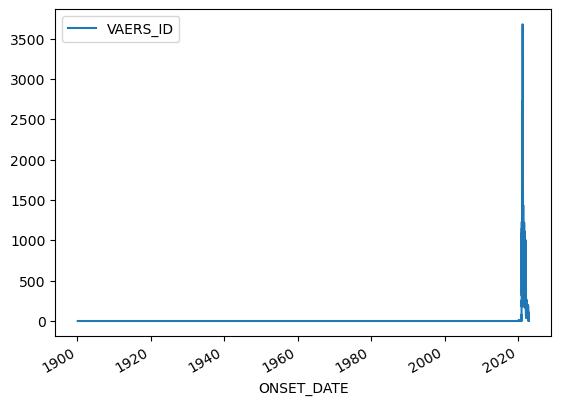

In [269]:
trend_line_days = trend_line.groupby(['ONSET_DATE']).agg({'VAERS_ID':'count'})
trend_line_days.plot(kind='line')#,x='ONSET_DATE',y='VAERS_ID') #,subplots='STATE')

In [270]:
trend_line['month_year'] = trend_line['ONSET_DATE'].dt.strftime('%m-%Y')


C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\3297460281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_line['month_year'] = trend_line['ONSET_DATE'].dt.strftime('%m-%Y')


array([<AxesSubplot:xlabel='month_year'>], dtype=object)

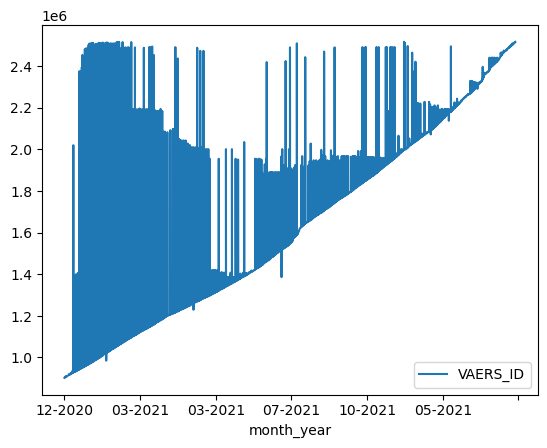

In [271]:
trend_line.plot(kind='line',x='month_year',y='VAERS_ID',subplots='STATE')

In [272]:
severe_combine.head(10)

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,...,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME,binned
3,902464,LA,42.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope,COVID19,"(18, 65]"
5,902468,NaN,59.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Chills,Defaecation urgency,Diarrhoea,Dizziness,COVID19,"(18, 65]"
6,902479,KS,46.0,F,NaN,NaN,NaN,NaN,Y,1.0,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest pain,Feeling abnormal,Flushing,Intensive care,NaN,COVID19,"(18, 65]"
8,902491,NE,41.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Dyspnoea,Erythema,Headache,COVID19,"(18, 65]"
9,902492,AR,44.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Dizziness,Feeling hot,Nausea,Visual impairment,COVID19,"(18, 65]"
11,902505,KS,39.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood pressure increased,Ear discomfort,Flushing,Palpitations,Paraesthesia,COVID19,"(18, 65]"
16,902557,AK,32.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Blood glucose normal,Blood test,Dyspnoea,Erythema,Flushing,COVID19,"(18, 65]"
22,902648,CA,26.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),Feeling hot,Rash,NaN,NaN,NaN,COVID19,"(18, 65]"
23,902650,MO,34.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,NaN,NaN,NaN,NaN,COVID19,"(18, 65]"
26,902665,MI,42.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Cold sweat,Condition aggravated,Dizziness,Panic attack,COVID19,"(18, 65]"


In [273]:
severe_combine.binned.value_counts()

(18, 65]     194272
(65, 150]     81562
(12, 18]       8469
(5, 12]        3449
(0, 5]         1110
Name: binned, dtype: int64

In [274]:
n = severe_combine.groupby(['binned', 'STATE']).count()

In [275]:
n.reset_index(inplace = True, drop = False)

In [276]:
n

,binned,STATE,VAERS_ID,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME
0,"(0, 5]",AK,3,3,3,0,0,1,0,0,...,3,2,2,3,3,2,2,2,2,3
1,"(0, 5]",AL,2,2,2,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
2,"(0, 5]",AR,5,5,5,0,0,0,0,0,...,5,5,3,5,5,3,3,3,3,5
3,"(0, 5]",AS,1,1,1,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
4,"(0, 5]",AZ,19,19,19,0,0,0,0,1,...,19,18,16,19,19,15,13,9,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,"(65, 150]",WV,372,372,372,47,45,28,0,174,...,371,240,218,372,372,331,283,224,163,372
311,"(65, 150]",WY,132,132,132,21,19,5,0,20,...,132,118,113,132,132,113,95,75,63,132
312,"(65, 150]",XB,2,2,2,1,1,0,0,1,...,2,1,1,2,2,2,2,2,1,2
313,"(65, 150]",XL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
n['binned']= n['binned'].astype(str)

In [278]:
n.binned = n.binned.str.strip()

In [279]:
severe_65 = n.loc[n['binned']=='(65, 150]']

In [280]:
covid_states_df

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_PFR,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,12/07/2022,49,OH,"29,711,725","1,008,800","10,758,240","17,922,085","22,600",0,"254,183",...,NaN,NaN,"1,448,780",13.2,"1,425,676",14.3,"1,386,545",15.2,"715,407",35.0
1,12/07/2022,49,IA,"8,731,035","292,700","3,283,220","5,138,915","16,200",0,"276,730",...,NaN,NaN,"484,166",16.4,"477,356",17.8,"463,323",19.1,"250,822",45.4
2,12/07/2022,49,VI,"167,860","3,200","46,240","118,220",200,0,"157,926",...,NaN,NaN,"2,440",2.4,"2,433",2.7,"2,412",3.0,"1,414",6.9
3,12/07/2022,49,TN,"16,312,400","529,600","6,078,280","9,690,420","14,100",0,"238,863",...,NaN,NaN,"554,687",8.6,"549,243",9.4,"536,787",10.1,"286,123",25.0
4,12/07/2022,49,ND,"1,794,020","53,600","638,220","1,100,000","2,200",0,"235,417",...,NaN,NaN,"92,565",13.1,"90,914",14.3,"87,890",15.1,"46,773",39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37075,12/13/2020,51,AS,"3,900",0,0,0,NaN,0,"7,003",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37076,12/13/2020,51,LTC,0,0,0,0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37077,12/13/2020,51,VI,975,0,0,0,NaN,0,931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37078,12/13/2020,51,US,"13,650",0,0,0,NaN,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
covid_states_df_age = covid_states_df.loc[covid_states_df['Date']=='12/07/2022']

In [282]:
covid_states_5plus = covid_states_df_age[['Location','Administered_5Plus']]

In [283]:
covid_states_12plus = covid_states_df_age[['Location','Administered_12Plus']]

In [284]:
covid_states_18plus = covid_states_df_age[['Location','Administered_18Plus']]

In [285]:
covid_states_65plus = covid_states_df_age[['Location','Administered_65Plus']]

In [286]:
severe_65plus = pd.merge(severe_65,covid_states_65plus, left_on = 'STATE', right_on= 'Location', how ='inner' )

In [287]:
severe_65plus

,binned,STATE,VAERS_ID,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,...,VAX_SITE,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,V_NAME,Location,Administered_65Plus
0,"(65, 150]",AK,161,161,161,31,31,9,0,20,...,139,161,161,135,110,88,69,161,AK,"278,936"
1,"(65, 150]",AL,481,481,481,56,52,44,0,119,...,390,481,481,424,348,273,213,481,AL,"2,189,239"
2,"(65, 150]",AR,698,698,698,74,73,29,0,401,...,538,698,698,604,393,309,246,698,AR,"1,463,849"
3,"(65, 150]",AS,9,9,9,1,0,2,0,4,...,8,9,9,6,6,6,5,9,AS,"9,394"
4,"(65, 150]",AZ,1358,1358,1358,75,69,113,1,284,...,1140,1358,1358,1233,1034,859,703,1358,AZ,"4,301,166"
5,"(65, 150]",CA,5376,5376,5376,361,340,392,0,1165,...,4360,5376,5376,4750,3989,3283,2665,5376,CA,"19,529,279"
6,"(65, 150]",CO,1338,1338,1338,81,77,109,0,414,...,1101,1338,1338,1205,983,823,669,1338,CO,"3,085,370"
7,"(65, 150]",CT,769,769,769,40,39,43,0,165,...,611,769,769,697,610,510,401,769,CT,"2,407,768"
8,"(65, 150]",DC,108,108,108,11,11,12,0,26,...,95,108,108,92,79,61,57,108,DC,"358,769"
9,"(65, 150]",DE,239,239,239,20,20,16,0,48,...,204,239,239,221,185,145,117,239,DE,"648,800"


In [288]:
severe_65plus.columns

Index(['binned', 'STATE', 'VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'DATEDIED',
       'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
       'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'OTHER_MEDS',
       'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS',
       'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES',
       'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5', 'V_NAME', 'Location', 'Administered_65Plus'],
      dtype='object')

In [289]:
severe_65plus = severe_65plus[['binned', 'STATE', 'VAERS_ID', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
        'OFC_VISIT', 'ER_ED_VISIT', 'VAX_MANU', 'Administered_65Plus']]

In [290]:
severe_65plus['Administered_65Plus']=severe_65plus['Administered_65Plus'].str.replace(',','',regex=True)

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\1067541006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_65plus['Administered_65Plus']=severe_65plus['Administered_65Plus'].str.replace(',','',regex=True)


In [291]:
severe_65plus['Administered_65Plus']=severe_65plus['Administered_65Plus'].astype(int)

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\3580637552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_65plus['Administered_65Plus']=severe_65plus['Administered_65Plus'].astype(int)


In [292]:
severe_65plus_total = pd.DataFrame(severe_65plus.sum(axis = 0, numeric_only = True))
severe_65plus_total= severe_65plus_total.transpose()

In [293]:
severe_65plus_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_65Plus
0,69911,7669,4006,28102,18522,130,3674,33300,19717,69911,177729313


In [294]:
for ind, row in severe_65plus_total.iterrows():
    adm = row.Administered_65Plus
    severe_65plus_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_65plus_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_65plus_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_65plus_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_65plus_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_65plus_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_65plus_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_65plus_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_65plus_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [295]:
severe_65plus_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_65Plus
0,39.335661,4.314989,2.253989,15.811685,10.421466,0.073145,2.067189,18.736358,11.093837,69911,177729313


In [296]:
severe_65plus_total.to_csv('../data/severe_65plus_new.csv', index=False)

severe_65plus_total.to_csv('../data/severe_65plus_tab.csv', index=False)

In [297]:
for ind, row in severe_65plus.iterrows():
    adm = row.Administered_65Plus
    severe_65plus.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_65plus.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_65plus.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_65plus.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_65plus.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_65plus.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_65plus.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_65plus.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_65plus.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\1146700363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_65plus.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\1146700363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_65plus.loc[ind, 'DIED'] = (row.DIED/adm)*100000
C:\Users\dhana\AppData\Local\Temp\ipykernel_20012\1146700363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [298]:
severe_65plus

,binned,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_65Plus
0,"(65, 150]",AK,57.719333,11.113660,3.226547,7.170104,5.377578,1.075516,0.717010,30.472940,16.849743,161,278936
1,"(65, 150]",AL,21.971105,2.557966,2.009831,5.435679,4.248051,0.045678,1.598729,12.744154,7.536866,481,2189239
2,"(65, 150]",AR,47.682514,5.055166,1.981079,27.393536,14.414055,0.000000,1.707826,15.643690,8.334193,698,1463849
3,"(65, 150]",AS,95.805834,10.645093,21.290185,42.580370,31.935278,0.000000,10.645093,42.580370,21.290185,9,9394
4,"(65, 150]",AZ,31.572834,1.743713,2.627195,6.602861,5.393886,0.162747,3.022436,21.203553,9.811293,1358,4301166
5,"(65, 150]",CA,27.527898,1.848507,2.007243,5.965402,4.531657,0.056326,1.971399,17.916688,8.884097,5376,19529279
6,"(65, 150]",CO,43.365950,2.625293,3.532802,13.418164,9.658485,0.129644,2.722526,24.826844,13.969151,1338,3085370
7,"(65, 150]",CT,31.938293,1.661290,1.785886,6.852820,5.565320,0.041532,2.616531,21.306039,9.635480,769,2407768
8,"(65, 150]",DC,30.102935,3.066040,3.344771,7.247003,5.017156,0.000000,1.114924,18.953700,9.476850,108,358769
9,"(65, 150]",DE,36.837238,3.082614,2.466091,7.398274,5.240444,0.000000,1.695438,24.044390,9.864365,239,648800


In [299]:
severe_65plus.corr()

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_65Plus
VAERS_ID,1.000000,0.611316,0.472424,0.875772,0.825174,0.178790,0.012668,0.479739,0.758902,0.321063,-0.098552
DIED,0.611316,1.000000,0.382525,0.303135,0.327980,0.002500,-0.124253,0.012959,0.331004,-0.045471,-0.171319
L_THREAT,0.472424,0.382525,1.000000,0.242576,0.296863,-0.010057,0.202309,0.467458,0.327464,-0.094285,-0.153959
HOSPITAL,0.875772,0.303135,0.242576,1.000000,0.926630,0.080465,-0.027991,0.302100,0.684242,0.444668,-0.020810
HOSPDAYS,0.825174,0.327980,0.296863,0.926630,1.000000,0.019196,-0.015970,0.293284,0.667447,0.314431,-0.053230
X_STAY,0.178790,0.002500,-0.010057,0.080465,0.019196,1.000000,-0.101858,0.287687,0.230502,0.109418,0.007767
DISABLE,0.012668,-0.124253,0.202309,-0.027991,-0.015970,-0.101858,1.000000,-0.046909,-0.106208,-0.089234,-0.092900
OFC_VISIT,0.479739,0.012959,0.467458,0.302100,0.293284,0.287687,-0.046909,1.000000,0.674728,0.129824,-0.001396
ER_ED_VISIT,0.758902,0.331004,0.327464,0.684242,0.667447,0.230502,-0.106208,0.674728,1.000000,0.255069,-0.061122
VAX_MANU,0.321063,-0.045471,-0.094285,0.444668,0.314431,0.109418,-0.089234,0.129824,0.255069,1.000000,0.818817


In [300]:
import seaborn as sns

<AxesSubplot:>

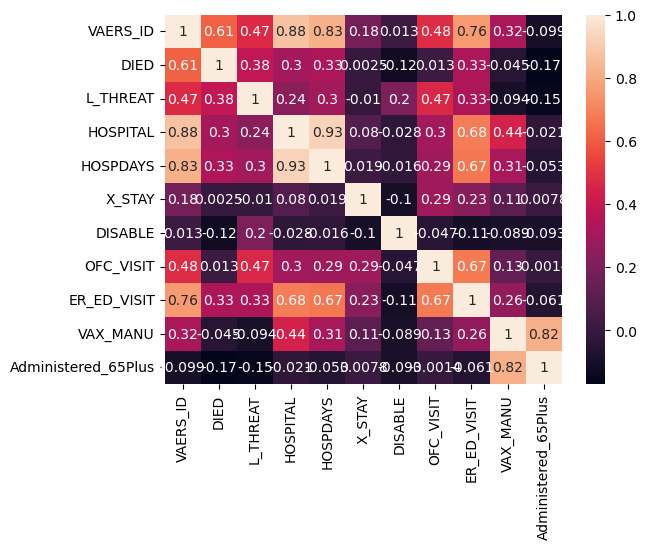

In [301]:
sns.heatmap(severe_65plus.corr(),annot = True)

In [302]:
severe_18 = n.loc[n['binned']=='(18, 65]']

In [303]:
severe_18plus = pd.merge(severe_18,covid_states_18plus, left_on = 'STATE', right_on= 'Location', how ='inner' )

In [304]:
severe_18plus = severe_18plus[['binned', 'STATE', 'VAERS_ID', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
        'OFC_VISIT', 'ER_ED_VISIT', 'VAX_MANU', 'Administered_18Plus']]

In [305]:
severe_18plus['Administered_18Plus']=severe_18plus['Administered_18Plus'].str.replace(',','',regex=True)

In [306]:
severe_18plus['Administered_18Plus']=severe_18plus['Administered_18Plus'].astype(int)

In [307]:
severe_18plus_total = pd.DataFrame(severe_18plus.sum(axis = 0, numeric_only = True))
severe_18plus_total= severe_18plus_total.transpose()

In [308]:
for ind, row in severe_18plus_total.iterrows():
    adm = row.Administered_18Plus
    severe_18plus_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_18plus_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_18plus_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_18plus_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_18plus_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_18plus_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_18plus_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_18plus_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_18plus_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [309]:
severe_18plus_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_18Plus
0,30.096101,0.489808,1.372688,4.565878,3.374765,0.031963,1.815062,20.320504,11.231081,177022,588189151


In [310]:
severe_18plus_total.to_csv('../data/severe_18plus_new.csv', index=False)

severe_18plus_total.to_csv('../data/severe_18plus_tab.csv', index=False)

In [311]:
for ind, row in severe_18plus.iterrows():
    adm = row.Administered_18Plus
    severe_18plus.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_18plus.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_18plus.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_18plus.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_18plus.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_18plus.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_18plus.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_18plus.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_18plus.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [312]:
severe_18plus

,binned,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_18Plus
0,"(18, 65]",AK,57.173045,0.347557,2.085339,4.605124,4.170678,0.000000,2.259117,38.491883,23.720731,658,1150892
1,"(18, 65]",AL,25.321551,0.468051,1.684983,3.151542,2.511873,0.015602,1.809797,17.785932,9.719856,1623,6409560
2,"(18, 65]",AR,31.183980,0.690930,1.520046,6.886270,4.237705,0.023031,1.773387,19.553323,9.995456,1354,4341973
3,"(18, 65]",AS,19.906789,0.000000,1.170988,3.512963,1.170988,0.000000,0.000000,12.880864,10.538888,17,85398
4,"(18, 65]",AZ,28.989498,0.379154,1.595607,3.388691,2.859455,0.031596,2.235430,20.766591,11.027068,3670,12659757
5,"(18, 65]",CA,26.592679,0.284512,1.105120,2.655448,2.139111,0.025027,1.816400,18.814693,10.297764,20189,75919391
6,"(18, 65]",CO,35.590506,0.317536,1.622962,4.727760,3.819254,0.026461,2.205112,24.406179,13.945128,4035,11337293
7,"(18, 65]",CT,30.509949,0.241135,1.218367,3.350510,2.627105,0.025383,1.814860,21.702168,12.056760,2404,7879397
8,"(18, 65]",DC,32.734642,0.404131,1.327860,3.233051,2.771187,0.000000,2.136123,24.305616,9.756886,567,1732110
9,"(18, 65]",DE,28.179501,0.218023,1.580668,4.414970,3.488371,0.054506,1.689680,19.676595,11.446219,517,1834667


<AxesSubplot:>

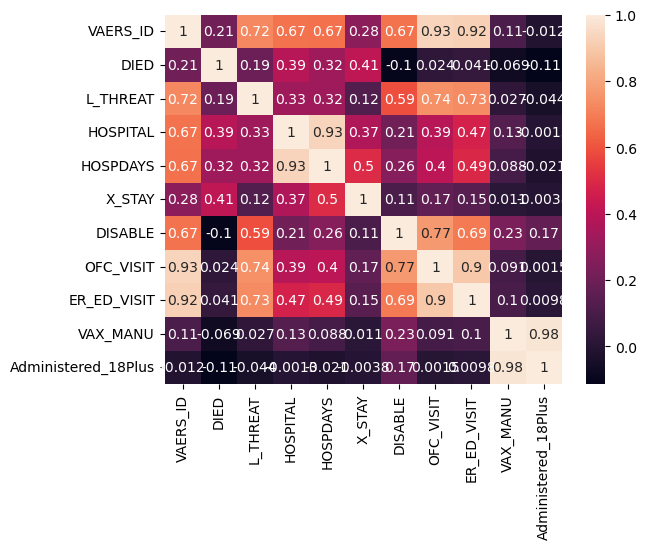

In [313]:
sns.heatmap(severe_18plus.corr(),annot = True)

In [314]:
severe_12 = n.loc[n['binned']=='(12, 18]']

In [315]:
severe_12plus = pd.merge(severe_12,covid_states_12plus, left_on = 'STATE', right_on= 'Location', how ='inner' )

In [316]:
severe_12plus = severe_12plus[['binned', 'STATE', 'VAERS_ID', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
        'OFC_VISIT', 'ER_ED_VISIT', 'VAX_MANU', 'Administered_12Plus']]

In [317]:
severe_12plus['Administered_12Plus']=severe_12plus['Administered_12Plus'].str.replace(',','',regex=True)

In [318]:
severe_12plus['Administered_12Plus']=severe_12plus['Administered_12Plus'].astype(int)

In [319]:
severe_12plus_total = pd.DataFrame(severe_12plus.sum(axis = 0, numeric_only = True))
severe_12plus_total= severe_12plus_total.transpose()

In [320]:
for ind, row in severe_12plus_total.iterrows():
    adm = row.Administered_12Plus
    severe_12plus_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_12plus_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_12plus_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_12plus_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_12plus_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_12plus_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_12plus_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_12plus_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_12plus_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [321]:
severe_12plus_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_12Plus
0,1.232851,0.008445,0.055611,0.257023,0.190736,0.002231,0.036809,0.689645,0.580971,7737,627569664


In [322]:
severe_12plus_total.to_csv('../data/severe_12plus_new.csv', index=False)

severe_12plus_total.to_csv('../data/severe_12plus_tab.csv', index=False)

In [323]:
for ind, row in severe_12plus.iterrows():
    adm = row.Administered_12Plus
    severe_12plus.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_12plus.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_12plus.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_12plus.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_12plus.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_12plus.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_12plus.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_12plus.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_12plus.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*10000

In [324]:
severe_12plus

,binned,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_12Plus
0,"(12, 18]",AK,1.619141,0.000000,0.161914,0.161914,0.161914,0.000000,0.080957,1.052442,0.072861,20,1235223
1,"(12, 18]",AL,0.816125,0.014839,0.059355,0.103870,0.103870,0.000000,0.014839,0.474836,0.038580,55,6739165
2,"(12, 18]",AR,0.822566,0.021646,0.021646,0.216465,0.151525,0.000000,0.064939,0.519516,0.025976,38,4619688
3,"(12, 18]",AS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,102094
4,"(12, 18]",AZ,1.016250,0.000000,0.044185,0.206196,0.147283,0.000000,0.051549,0.581766,0.050813,138,13579335
5,"(12, 18]",CA,1.361190,0.006120,0.055084,0.248491,0.193407,0.001224,0.042843,0.739352,0.064877,1112,81693205
6,"(12, 18]",CO,1.438070,0.008265,0.074383,0.272737,0.198355,0.000000,0.033059,0.809948,0.061986,174,12099547
7,"(12, 18]",CT,1.255982,0.000000,0.047396,0.296222,0.177733,0.011849,0.047396,0.722782,0.068724,106,8439613
8,"(12, 18]",DC,0.385978,0.000000,0.000000,0.110279,0.110279,0.000000,0.000000,0.220559,0.011028,7,1813575
9,"(12, 18]",DE,1.331552,0.000000,0.051214,0.307281,0.307281,0.000000,0.051214,0.716989,0.056335,26,1952609


<AxesSubplot:>

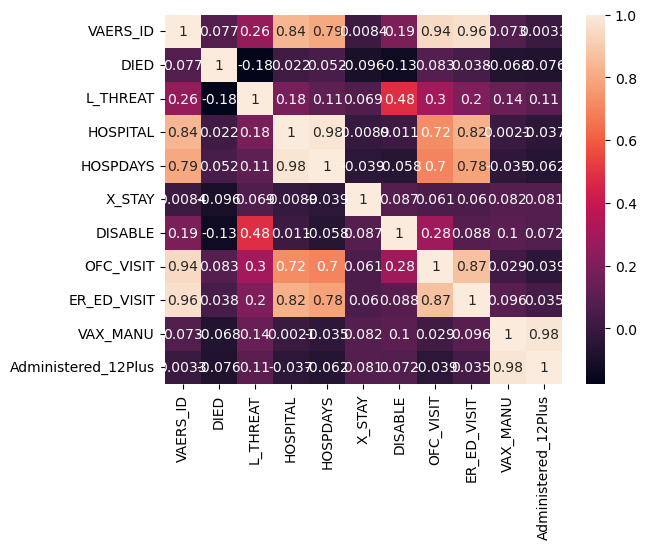

In [325]:
sns.heatmap(severe_12plus.corr(),annot = True)

In [326]:
severe_5 = n.loc[n['binned']=='(5, 12]']

In [327]:
severe_5plus = pd.merge(severe_5,covid_states_5plus, left_on = 'STATE', right_on= 'Location', how ='inner' )

In [328]:
severe_5plus = severe_5plus[['binned', 'STATE', 'VAERS_ID', 'DIED', 'L_THREAT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE',
        'OFC_VISIT', 'ER_ED_VISIT', 'VAX_MANU', 'Administered_5Plus']]

In [329]:
severe_5plus['Administered_5Plus']=severe_5plus['Administered_5Plus'].str.replace(',','',regex=True)

In [330]:
severe_5plus['Administered_5Plus']=severe_5plus['Administered_5Plus'].astype(int)

In [331]:
severe_5plus_total = pd.DataFrame(severe_5plus.sum(axis = 0, numeric_only = True))
severe_5plus_total =severe_5plus_total.transpose()

In [332]:
severe_5plus_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_5Plus
0,3108,10,71,393,315,2,69,2232,1016,3108,650360755


In [333]:
for ind, row in severe_5plus_total.iterrows():
    adm = row.Administered_5Plus
    severe_5plus_total.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_5plus_total.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_5plus_total.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_5plus_total.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_5plus_total.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_5plus_total.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_5plus_total.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_5plus_total.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_5plus_total.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*100000

In [334]:
severe_5plus_total

,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_5Plus
0,0.477889,0.001538,0.010917,0.060428,0.048435,0.000308,0.010609,0.343194,0.156221,3108,650360755


In [335]:
severe_5plus_total.to_csv('../data/severe_5plus_new.csv', index=False)

severe_5plus_total.to_csv('../data/severe_5plus_tab.csv', index=False)

In [336]:
for ind, row in severe_5plus.iterrows():
    adm = row.Administered_5Plus
    severe_5plus.loc[ind,'VAERS_ID'] = (row.VAERS_ID/adm)*100000
    severe_5plus.loc[ind, 'DIED'] = (row.DIED/adm)*100000
    severe_5plus.loc[ind,'L_THREAT'] = (row.L_THREAT/adm)*100000
    severe_5plus.loc[ind,'HOSPITAL'] = (row.HOSPITAL/adm)*100000
    severe_5plus.loc[ind,'HOSPDAYS'] = (row.HOSPDAYS/adm)*100000
    severe_5plus.loc[ind,'X_STAY'] = (row.X_STAY/adm)*100000
    severe_5plus.loc[ind,'DISABLE'] = (row.DISABLE/adm)*100000
    severe_5plus.loc[ind,'OFC_VISIT'] = (row.OFC_VISIT/adm)*100000
    severe_5plus.loc[ind,'ER_ED_VISIT'] = (row.ER_ED_VISIT/adm)*10000

In [337]:
severe_5plus

,binned,STATE,VAERS_ID,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,OFC_VISIT,ER_ED_VISIT,VAX_MANU,Administered_5Plus
0,"(5, 12]",AK,1.631457,0.000000,0.077688,0.155377,0.155377,0.000000,0.000000,1.087638,0.046613,21,1287193
1,"(5, 12]",AL,0.363735,0.000000,0.000000,0.029099,0.014549,0.000000,0.014549,0.290988,0.013094,25,6873138
2,"(5, 12]",AR,0.399821,0.000000,0.021043,0.084173,0.063130,0.000000,0.042086,0.315648,0.012626,19,4752128
3,"(5, 12]",AS,0.870822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.870822,0.000000,1,114834
4,"(5, 12]",AZ,0.375873,0.000000,0.014184,0.035460,0.021276,0.000000,0.000000,0.304953,0.012056,53,14100511
5,"(5, 12]",CA,0.560523,0.001175,0.007051,0.059930,0.049354,0.000000,0.015276,0.397184,0.018332,477,85099106
6,"(5, 12]",CO,0.604238,0.000000,0.031802,0.063604,0.055653,0.000000,0.023851,0.437277,0.025442,76,12577832
7,"(5, 12]",CT,0.559874,0.000000,0.034278,0.102834,0.068556,0.000000,0.000000,0.388484,0.021709,49,8751965
8,"(5, 12]",DC,0.371617,0.000000,0.053088,0.000000,0.000000,0.000000,0.000000,0.371617,0.005309,7,1883662
9,"(5, 12]",DE,0.545829,0.000000,0.000000,0.099242,0.099242,0.000000,0.049621,0.396967,0.024810,11,2015283


<AxesSubplot:>

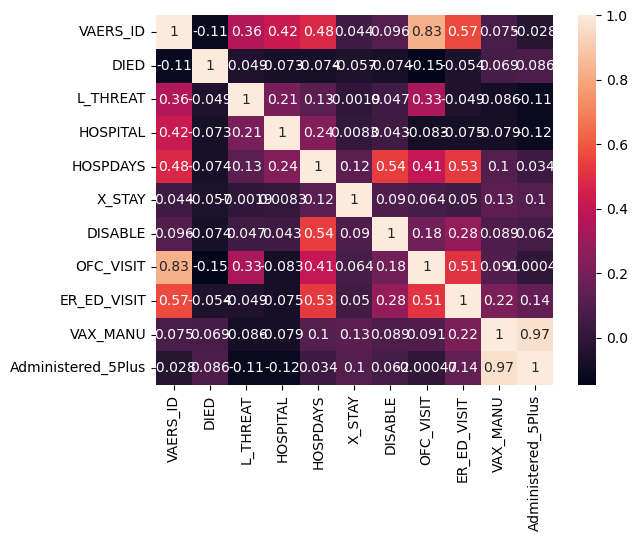

In [338]:
sns.heatmap(severe_5plus.corr(),annot = True)